# DataMadness 2023: Ultimate Simpsons Guide

By Jan Grapenthin, Nikola Prianikov, Michael Balzer

## Part 0: Motivation

Questions to be answered in this project:
- Which guest speaker is the funniest?
- How does speaking time of characters changes over seasons?
- How does demographics influence the rating?
- What features have the most impact on rating?

## Part 1: Data retrieving and Scrapping

TODO:
1. IMDB ratings per episode for age/gender e.g.: https://www.imdb.com/title/tt0701122/ratings/?ref_=tt_ov_rt
    - look for episode titles here: https://www.imdb.com/title/tt0096697/episodes?season=1
2. Episode features from fandom wiki e.g., https://simpsons.fandom.com/wiki/Some_Enchanted_Evening
    - look for things inside <asdie role='region'> blob
3. Episode insight from fandom wiki e.g., https://simpsons.fandom.com/wiki/Some_Enchanted_Evening/References
    - look for Trivia, Cultural References, Goofs, etc...

### What features do we want to add

From IMDB:
* Ratings by demographics per episode (apprx. 600 episodes)

From fandom wiki 'region' blob of episode:
* main_character(s)
* blackboardText
* couchGag
* specialGuestVoices
* Show Runner
* Written By
* Directed By

From fandom wiki References page of each episode
* Cultural references
* Trivia
* Goofs
* Previous Episode References - a bit more detailed here e.g., from which season/episode was the reference made
* Continuity (wtf is this but we can probably keep it)

Scraping code can be found in the ./scraping_scripts folder. To run scraper yourself use run_scraper.py.

## Part 2: Exploratory Data Analysis

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

In [197]:
demographics = pd.read_csv('./Datasets/scraped/voting_demographics.csv')

demographics.describe()
demographics.columns

Index(['Unnamed: 0', 'season', 'episode', 'total_counts', 'total_rating',
       '<18_counts', '<18_rating', '18-29_counts', '18-29_rating',
       '30-44_counts', '30-44_rating', '45+_counts', '45+_rating',
       'male_counts', 'male_rating', 'male_<18_counts', 'male_<18_rating',
       'male_18-29_counts', 'male_18-29_rating', 'male_30-44_counts',
       'male_30-44_rating', 'male_45+_counts', 'male_45+_rating',
       'female_counts', 'female_rating', 'female_<18_counts',
       'female_<18_rating', 'female_18-29_counts', 'female_18-29_rating',
       'female_30-44_counts', 'female_30-44_rating', 'female_45+_counts',
       'female_45+_rating', 'top1000_counts', 'top1000_rating',
       'us_users_counts', 'us_users_rating', 'non-us_users_counts',
       'non-us_users_rating'],
      dtype='object')

<Axes: ylabel='Density'>

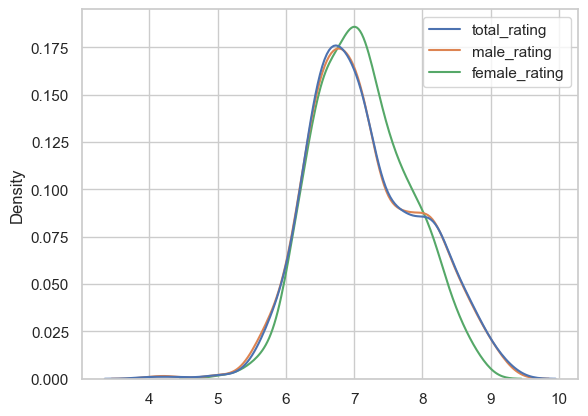

In [198]:
sns.kdeplot(data=[demographics['total_rating'], demographics['male_rating'], demographics['female_rating']], legend=True)


Females give higher ratings on average, indication of much less female voters than male voters since male curve follows total curve accurately while female curve is off.

<Axes: ylabel='Density'>

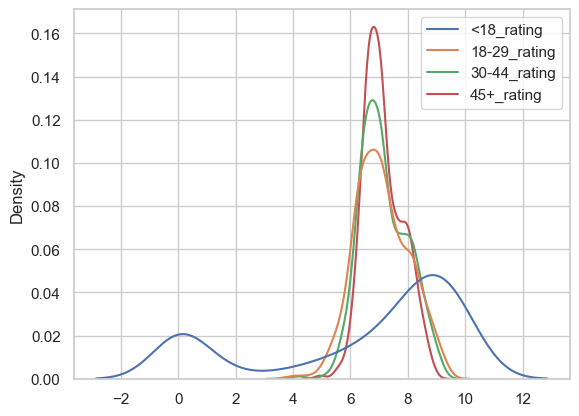

In [199]:
sns.kdeplot(data=[demographics['<18_rating'], demographics['18-29_rating'], demographics['30-44_rating'],demographics['45+_rating']])

The only age group that seems to behave significantly different is the age group <18, which indicates that there is no real influence of the age on voting behavior.

<Axes: ylabel='Density'>

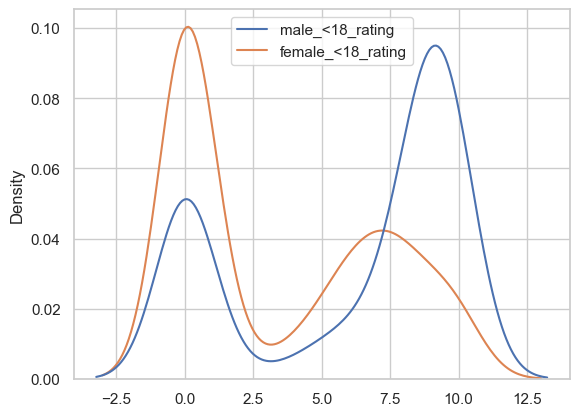

In [200]:
sns.kdeplot(data=[demographics['male_<18_rating'], demographics['female_<18_rating']])

Female voters seem to give mostly bad rating while male voters give mostly good ratings, and the ratings overall just split into two main extremes.

<Axes: ylabel='Density'>

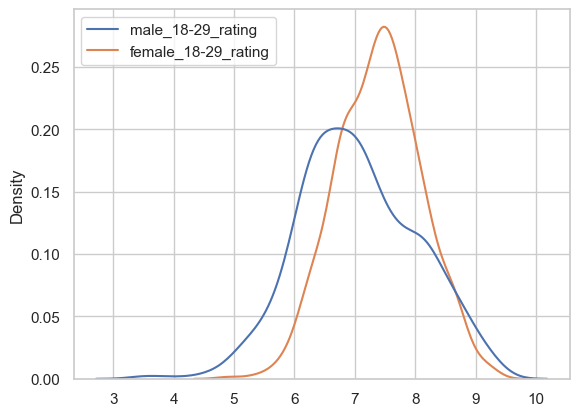

In [201]:
sns.kdeplot(data=[demographics['male_18-29_rating'], demographics['female_18-29_rating']])

As the age progresses the voting behavior seems to unify

In [202]:
sns.kdeplot(data=[demographics['male_30-44_rating'], demographics['female_30-44_rating']])

<Axes: ylabel='Density'>

Even more similar

In [203]:
sns.kdeplot(data=[demographics['male_45+_rating'], demographics['female_45+_rating']])

<Axes: ylabel='Density'>

For 45+ the female behavior changes again, possibly due to a difference in population size

In [204]:
sns.lineplot(x=demographics['Unnamed: 0'], y=demographics['male_counts']/demographics['female_counts'])

<Axes: xlabel='Unnamed: 0'>

As suspected male voter audience 4 to 15 times larger than the female voting audience.

In [205]:
for season in demographics['season'].value_counts().keys():
    sns.kdeplot(data=[demographics.loc[demographics['season'] == season, 'male_rating']])

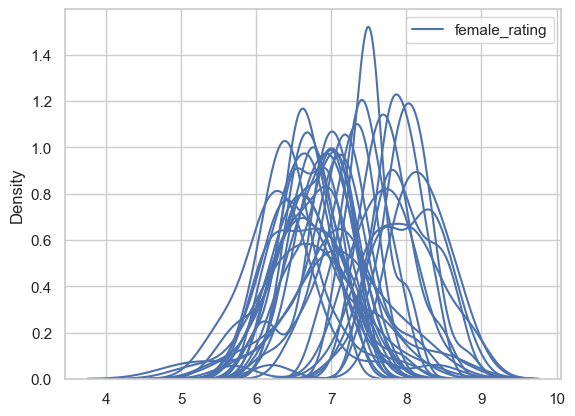

In [206]:
for season in demographics['season'].value_counts().keys():
    sns.kdeplot(data=[demographics.loc[demographics['season'] == season, 'female_rating']])

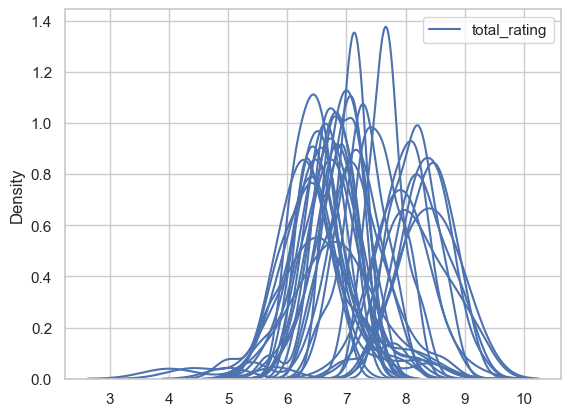

In [207]:
for season in demographics['season'].value_counts().keys():
    sns.kdeplot(data=[demographics.loc[demographics['season'] == season, 'total_rating']])

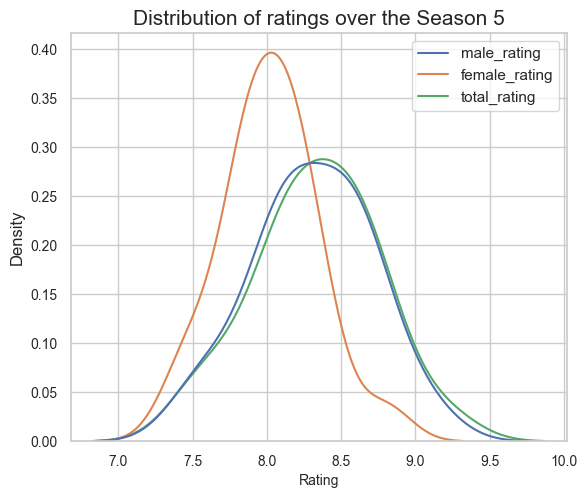

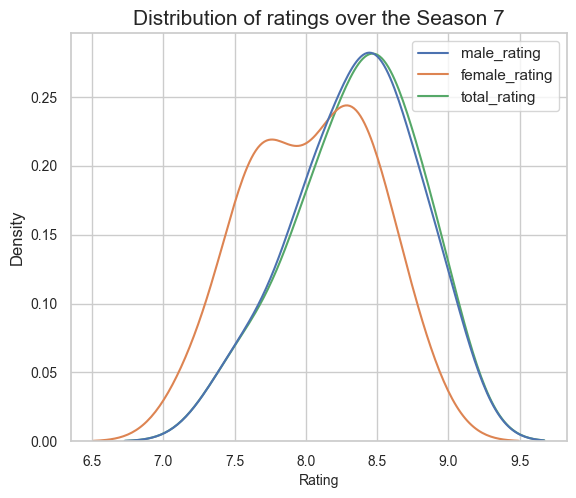

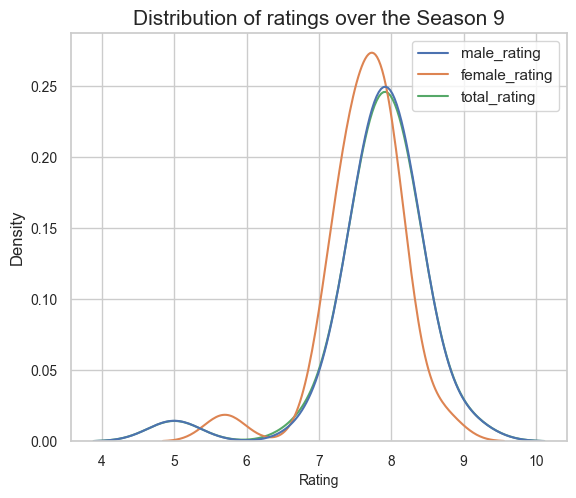

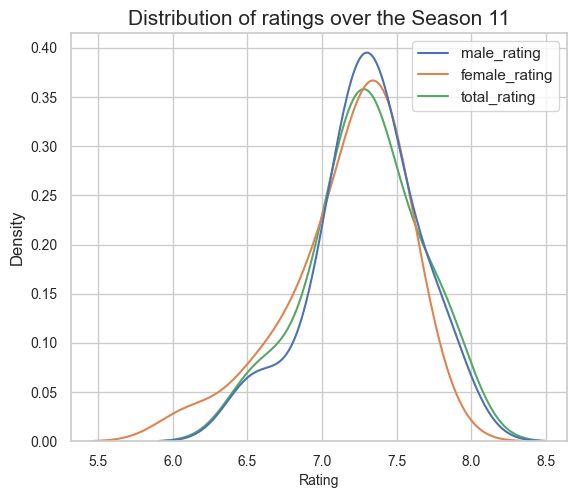

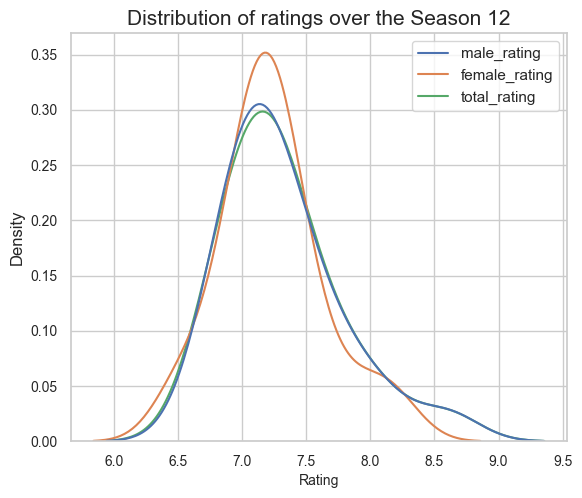

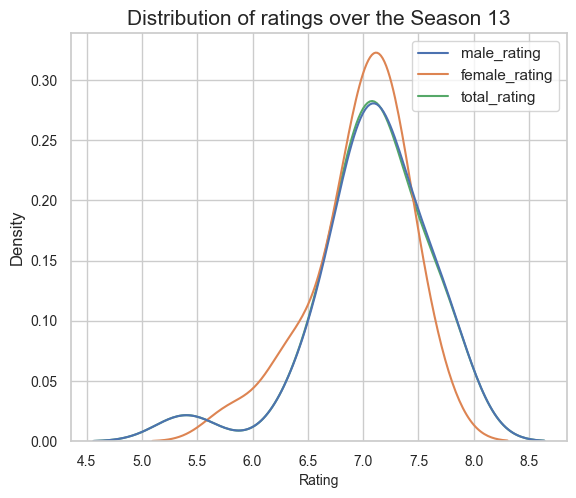

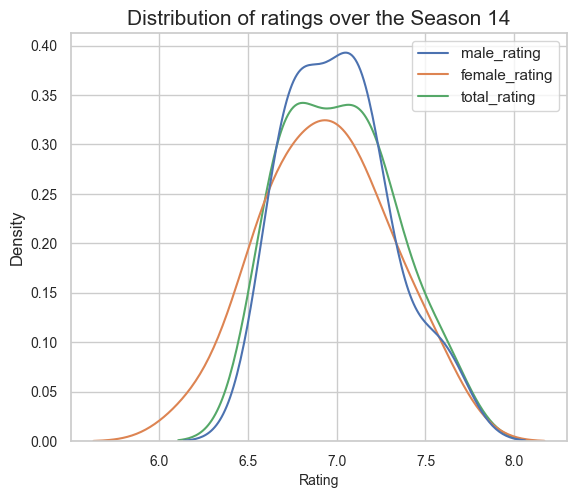

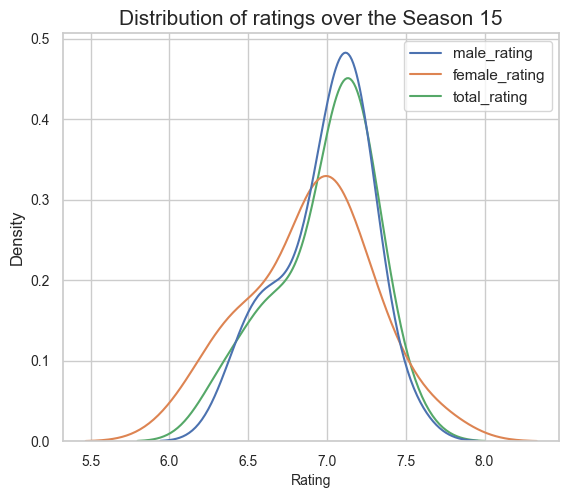

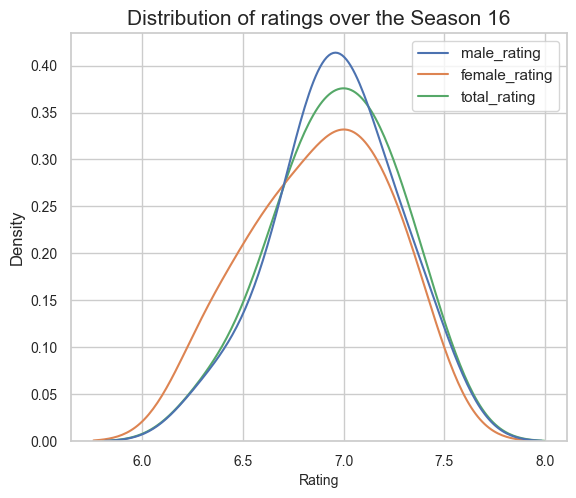

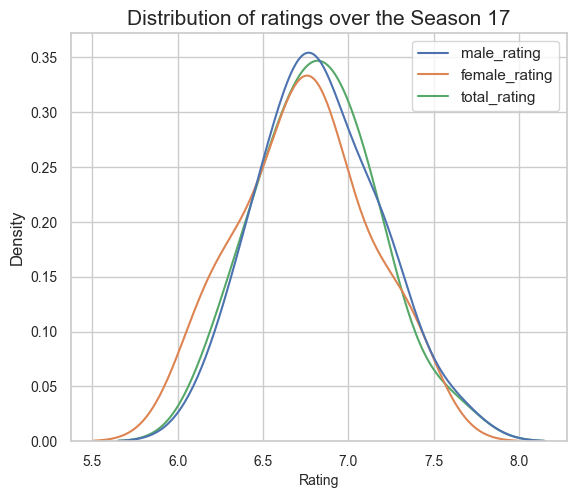

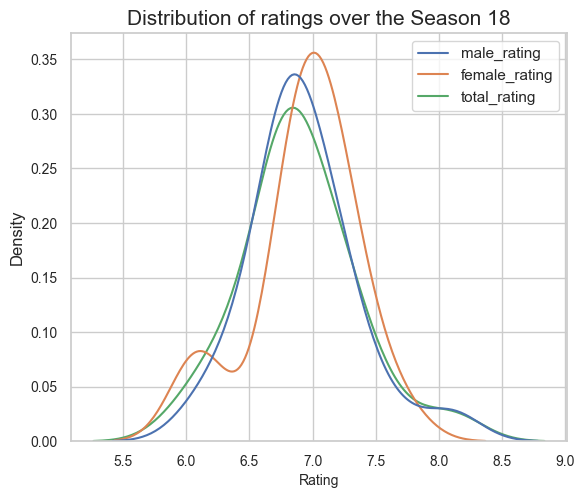

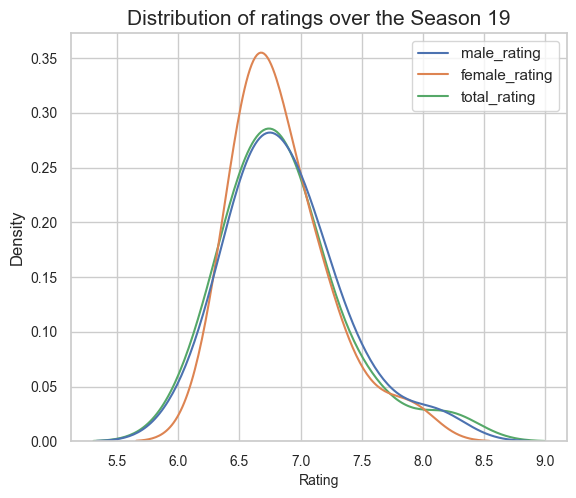

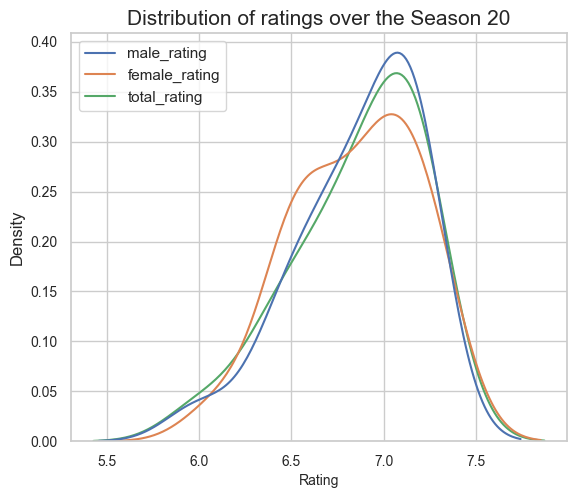

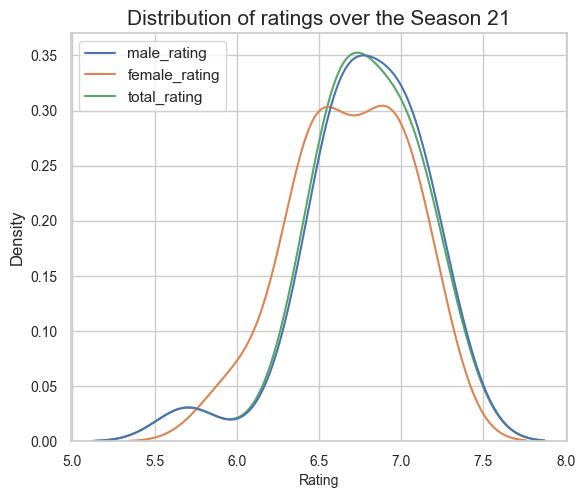

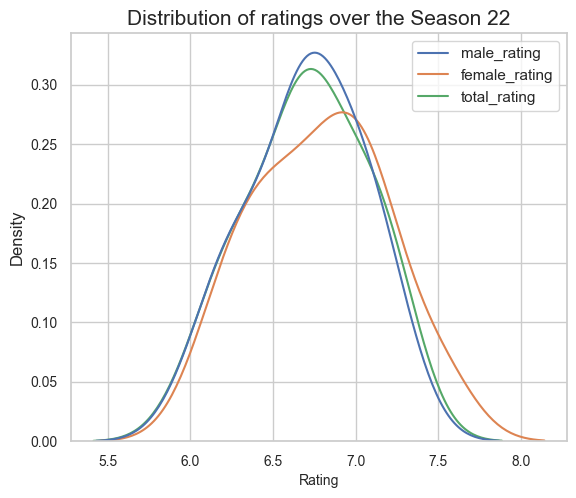

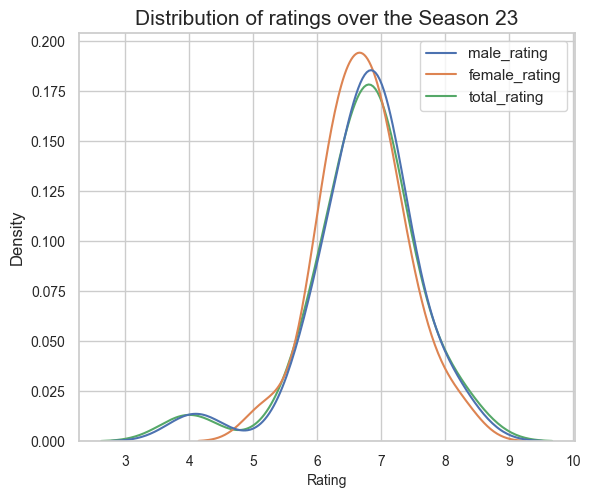

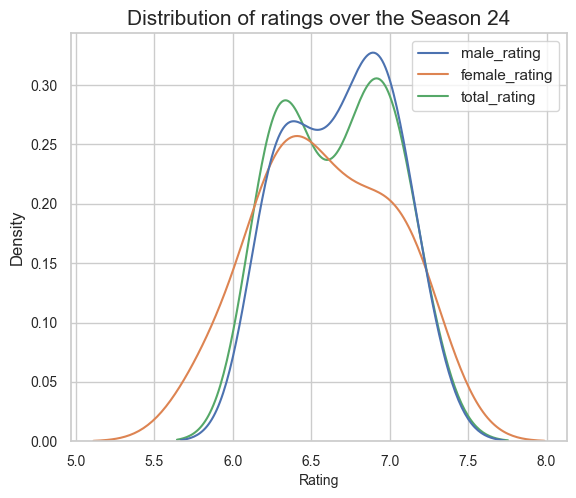

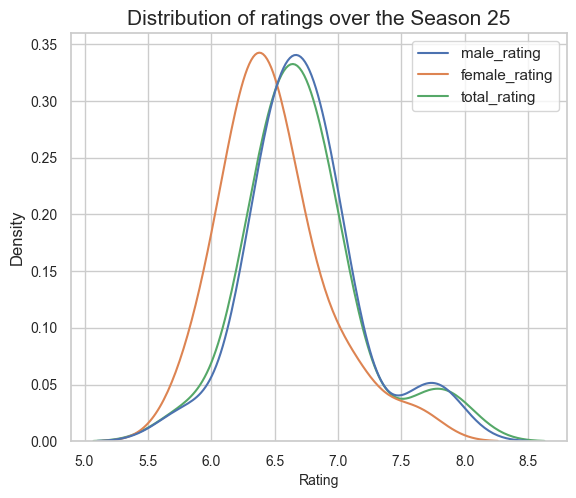

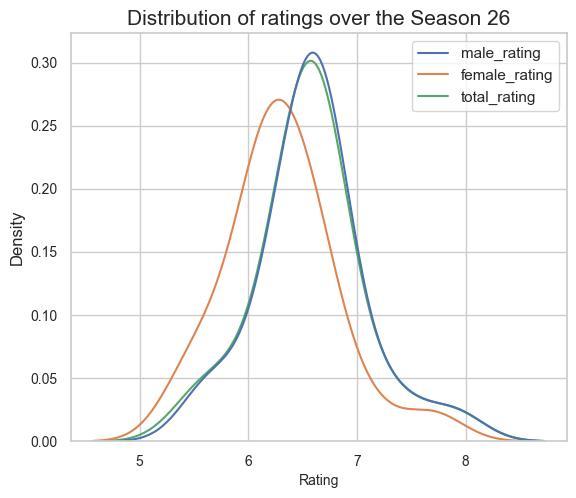

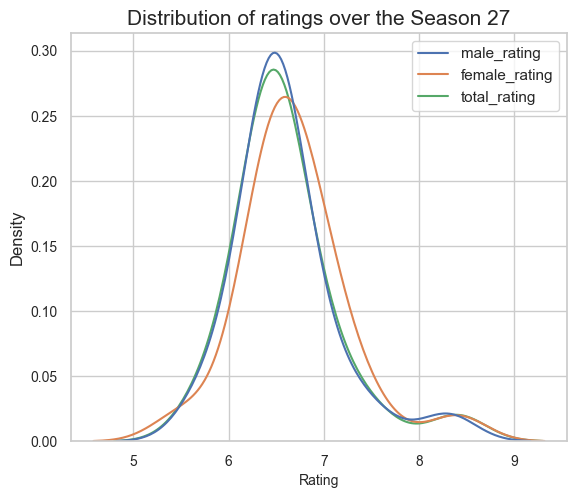

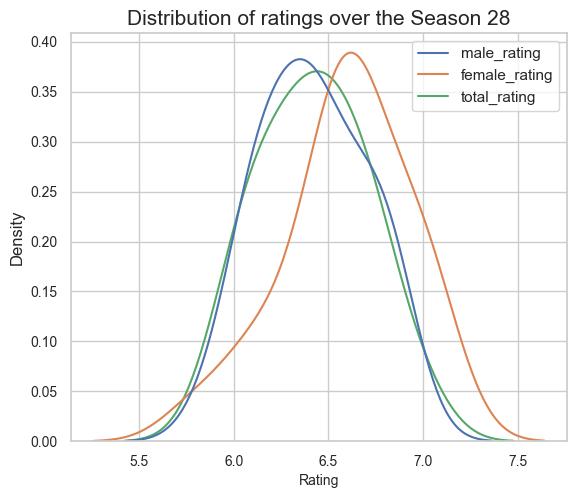

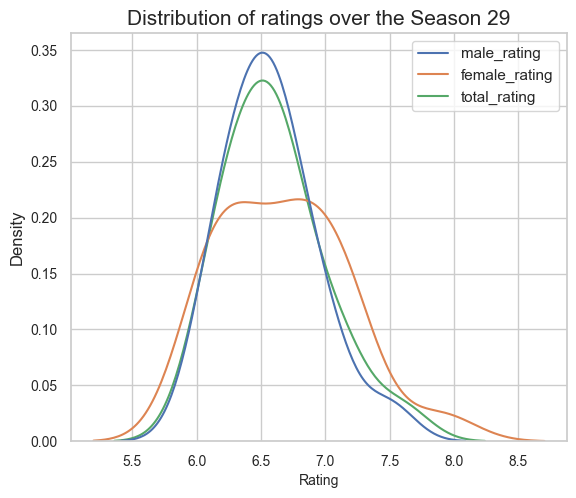

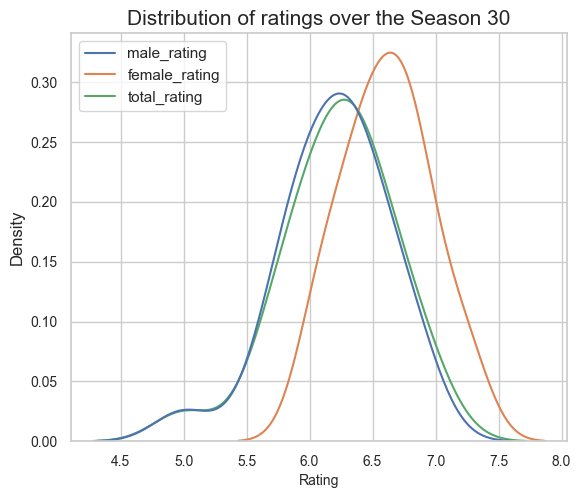

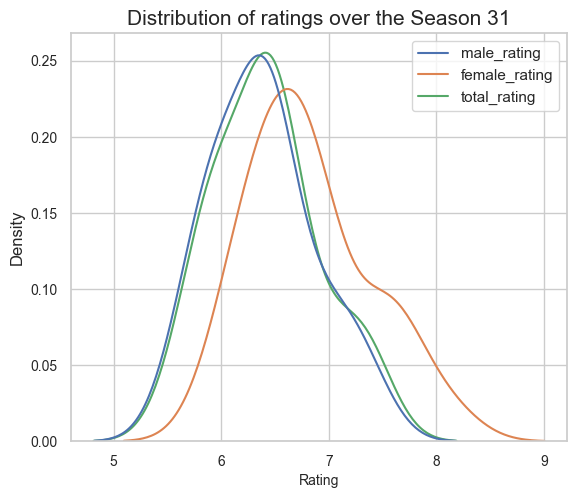

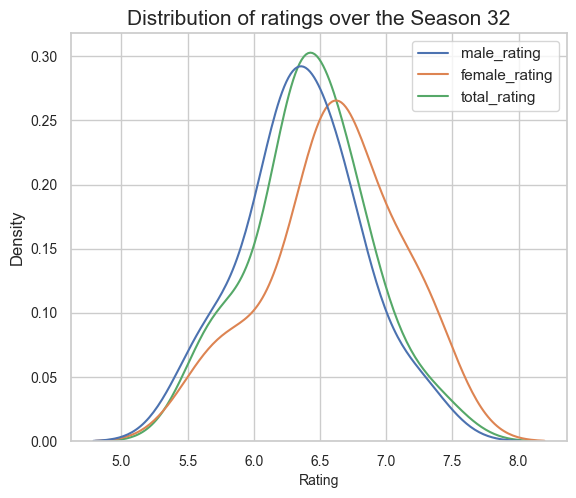

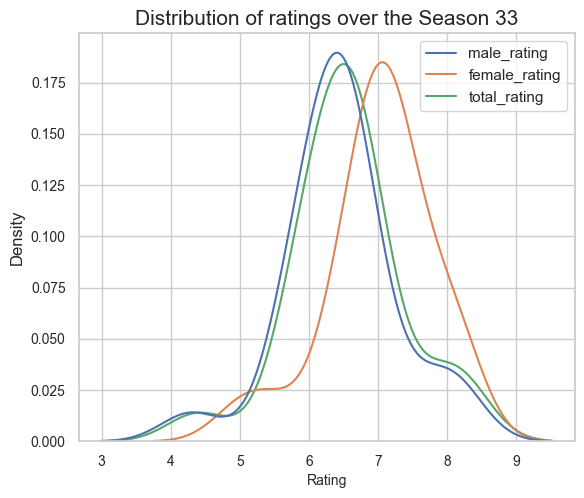

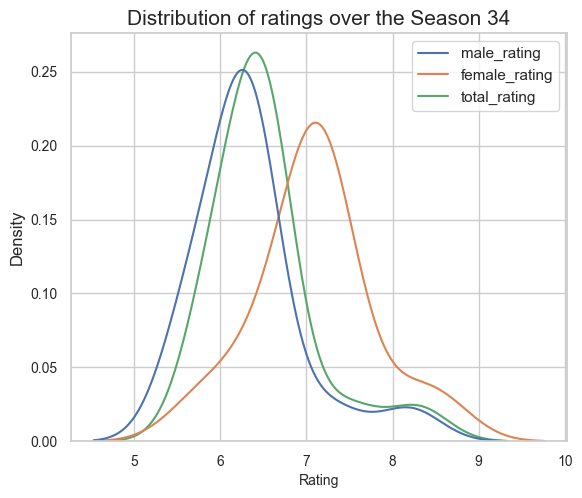

In [208]:
def plot_seasons_ratings():
    seasons = [int(x) for x in demographics['season'].unique().tolist()]
    for idx in seasons:
        plt.title(f"Distribution of ratings over the Season {idx}", fontdict={"fontsize": 15})
        plt.xlabel('Rating', fontdict={"fontsize": 10})
        plt.tick_params(axis="both", which="major", labelsize=10)
        sns.kdeplot(data=[demographics.loc[demographics['season'] == idx, 'male_rating'],
                      demographics.loc[demographics['season'] == idx, 'female_rating'],
                       demographics.loc[demographics['season'] == idx, 'total_rating']])
        plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
        plt.show()

plot_seasons_ratings()

# Which guest speaker is the best one? #

In this section we are exploring the distribution over the rating of the guest speakers. Are there any guest speakers that perform significantly better than others and are episodes with guest speakers that are generally funnier than other ones?

In [209]:
df = pd.read_csv('Datasets/scraped/box_data.csv')
df.head()

production_code                       voice  \
0            7G08                         NaN   
1            7G02  Marcia Wallace, Ms. Mellon   
2            7G03              Marcia Wallace   
3            7G04                         NaN   
4            7G05                         NaN   

                                  chalkboard_gag                 couch_gag  \
0                                            NaN                       NaN   
1                       "I will not waste chalk"   Squashed Bart couch gag   
2           "I will not skateboard in the halls"   llapsed Couch couch gag   
3                     "I will not burp in class"  Squashed Homer couch gag   
4  This episode did not feature a chalkboard gag                       NaN   

                                 show_runner                     written_by  \
0  James L. Brooks, Matt Groening, Sam Simon                      Mimi Pond   
1  James L. Brooks, Matt Groening, Sam Simon                      Jon Vitti   
2  James L. Brooks, Matt Groening, Sam Simon  Jay Kogen, Wallace Wolodarsky   
3  James L. Brooks, Matt Groening, Sam Simon            Al Jean, Mike Reiss   
4  James L. Brooks, Matt Groening, Sam Simon              John Swartzwelder   

                     directed_by  
0                David Silverman  
1                David Silverman  
2                     Wes Archer  
3  Gregg Vanzo, Kent Butterworth  
4                David Silverman

In [210]:
df_full = df.copy()
df = df.dropna(subset=['voice'])
df['voice'] = df['voice'].str.split(',')
frame = df[['production_code', 'voice']].explode('voice')

In [211]:
speaker_production_code = []
for guest in frame['voice'].unique():
    speaker_production_code.append(frame[frame['voice'] == guest]['production_code'].tolist())

guest_speaker_dict = {}
for i in range(len(speaker_production_code)):
    guest_speaker_dict[frame['voice'].unique()[i]] = speaker_production_code[i]

In [212]:
df_episodes = pd.read_csv('./Datasets/data-society-the-simpsons-by-the-data/simpsons_episodes.csv')
df_episodes[['imdb_rating','imdb_votes']] = df_episodes[['imdb_rating','imdb_votes']].fillna(0)
df_episodes[['imdb_rating', 'imdb_votes']] = df_episodes[['imdb_rating', 'imdb_votes']].replace('', 0)


df_guest_speaker_rating = pd.DataFrame(columns=['guest_speaker', 'imdb_rating', 'imd_votes', 'number_of_episodes'])
for i in range(len(speaker_production_code)):
    
    episodes_speaker = guest_speaker_dict[frame['voice'].unique()[i]]
    guest_speaker = frame['voice'].unique()[i]
    num_episodes = len(episodes_speaker)
    episodes_rating = []
    episodes_votes = []

    for episode in episodes_speaker:
        #only take the episodes that we have the data from in the kaggle csv sheet
        if episode not in df_episodes['production_code'].unique():
            continue

        rating = df_episodes.loc[df_episodes['production_code'] == episode, 'imdb_rating'].values[0]
        votes = df_episodes.loc[df_episodes['production_code'] == episode, 'imdb_votes'].values[0]
        episodes_rating.append(rating)
        episodes_votes.append(votes)

    df_guest_speaker_rating.loc[i] = [guest_speaker, episodes_rating, episodes_votes, num_episodes]

In [213]:
df_guest_speaker_rating.to_csv('./Datasets/scraped/guest_speaker_rating.csv')
df_guest_speaker_rating.head()

guest_speaker                                        imdb_rating  \
0  Marcia Wallace  [7.8, 7.5, 8.2, 8.3, 8.4, 8.4, 8.2, 8.4, 8.2, ...   
1      Ms. Mellon                                              [7.8]   
2      Ron Taylor                                         [7.6, 8.3]   
3   Albert Brooks                [7.9, 7.5, 6.0, 9.2, 7.2, 7.3, 6.8]   
4    Sam McMurray                                              [7.4]   

                                           imd_votes  number_of_episodes  
0  [1973.0, 1709.0, 1369.0, 1272.0, 1414.0, 1394....                  25  
1                                           [1973.0]                   1  
2                                   [1674.0, 1084.0]                   2  
3  [1638.0, 1578.0, 1051.0, 2439.0, 562.0, 505.0,...                   7  
4                                           [1511.0]                   1

<Axes: xlabel='guest_speaker'>

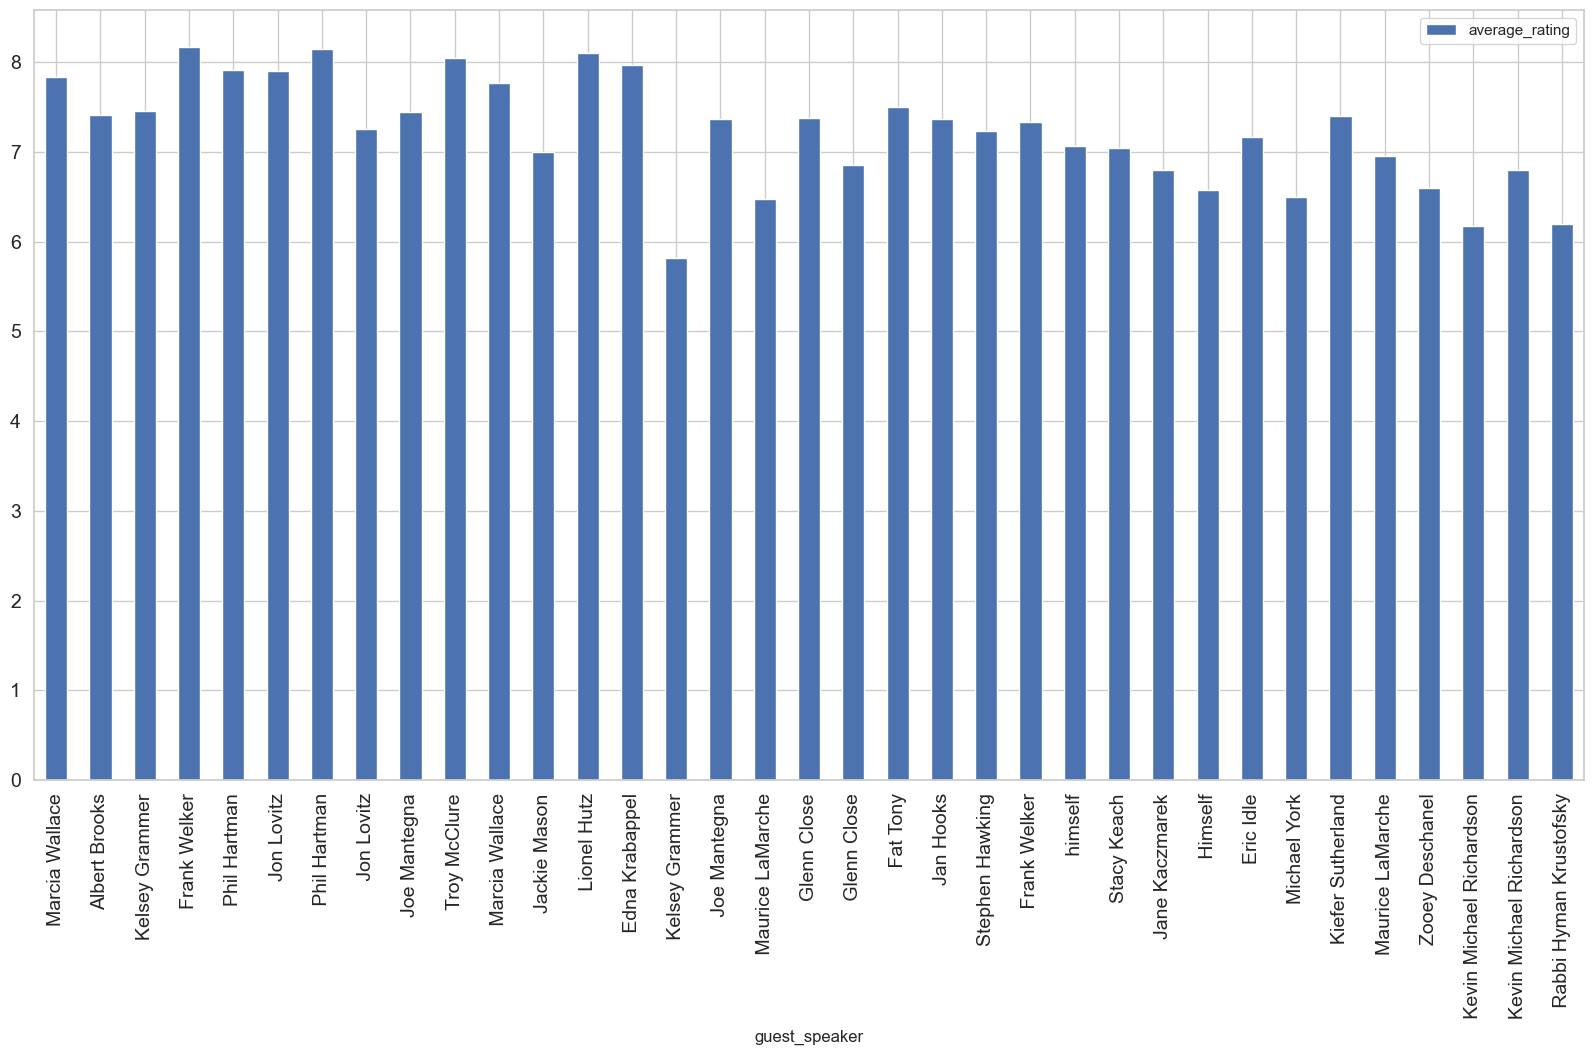

In [214]:
df_guest_speaker_rating.head()
df_guest_speaker_rating = df_guest_speaker_rating[df_guest_speaker_rating['imdb_rating'].map(len) > 0]

df_guest_speaker_rating['average_rating'] = df_guest_speaker_rating['imdb_rating'].apply(lambda x: np.average(x))
df_guest_speaker_rating['average_rating'] = df_guest_speaker_rating['average_rating'].sort_values(ascending=False)

df_guest_speaker_rating[df_guest_speaker_rating['number_of_episodes'] >= 3].plot(x='guest_speaker', y='average_rating', kind='bar', figsize=(20,10), fontsize=14)

It becomes clear that the rating of the guest speakers is uniformly distributed. There doesnt seem to be a guest speaker that stands out from the rest.

# Do episodes with guest speakers get better reviews than the ones without? #

In [215]:
df_guest_speaker = df_full.dropna(subset=['voice'])
df_no_guest_speaker = df_full[df_full['voice'].isna()]

df_episodes = pd.read_csv('Datasets/data-society-the-simpsons-by-the-data/simpsons_episodes.csv')

print('Average with guest speakers',df_episodes[df_episodes['production_code'].isin(df_guest_speaker['production_code'])]['imdb_rating'].mean())
print('Average without a guest speaker',df_episodes[df_episodes['production_code'].isin(df_no_guest_speaker['production_code'])]['imdb_rating'].mean())

Average with guest speakers 7.393873085339169
Average without a guest speaker 7.385074626865671


It also becomes clear that episodes with guest speakers dont get a better rating than episodes without one. 

# Development of speaking time for the simpsons family over the course of time #
In the following script we are trying to find out how the speaking time of each character changes over the course of the seasons. Since the speaking time is roughly linearly dependant on the word count, we counted the words for each character in each episode and added it up over the seasons. To do that we first have to clean the dataset of outliers, because there are a couple values in there that are very unrealistic. Any cell above a 150 words is considered an outlier.

In [216]:
df_scripts = pd.read_csv('Datasets/data-society-the-simpsons-by-the-data/simpsons_script_lines.csv')
df_scripts.head()

df_scripts = df_scripts[df_scripts['word_count'] < 150]

C:\Users\nikol\AppData\Local\Temp\ipykernel_12904\361789780.py:1: DtypeWarning: Columns (4,5,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_scripts = pd.read_csv('Datasets/data-society-the-simpsons-by-the-data/simpsons_script_lines.csv')


Then we drop columns without a character_id or no record of the word_count

In [217]:
df_scripts = df_scripts.dropna(subset=['character_id','word_count'])
df_scripts['character_id'] = df_scripts['character_id'].astype(int)
df_scripts['word_count'] = df_scripts['word_count'].astype(int)
df_scripts = df_scripts[['character_id', 'word_count','episode_id']]	

In [218]:
episode_id = []
for episode in df_scripts['episode_id'].unique():
    episode_id.append(df_scripts[df_scripts['episode_id'] == episode][['character_id','word_count']].values)

In [219]:
df_characters = pd.read_csv('Datasets/data-society-the-simpsons-by-the-data/simpsons_characters.csv')
df_characters.head()

id              name   normalized_name gender
0   7          Children          children    NaN
1  12  Mechanical Santa  mechanical santa    NaN
2  13        Tattoo Man        tattoo man    NaN
3  16  DOCTOR ZITSOFSKY  doctor zitsofsky    NaN
4  20          Students          students    NaN

In [220]:
episode_dict = {}
for i,episode in enumerate(df_scripts['episode_id'].unique()):
    character_dict = {}
    id_list = episode_id[i].tolist()
    for line in id_list:
        if line[0] not in character_dict:
            character_dict[line[0]] = line[1]
        else:
            character_dict[line[0]] += line[1]
    episode_dict[episode] = character_dict

Now we have a dictionary with the episode_id as a key and a dictionary as a value. The dictionary has the character_id as a key and the word count of the character in that episode as a value. Now we need to group this by the season to get a wordcount for each character per season.

In [221]:
df_characters = pd.read_csv('Datasets/data-society-the-simpsons-by-the-data/simpsons_characters.csv')
df_characters.head()
def map_character_id_to_name(id):
    return df_characters.loc[df_characters['id'] == id, 'normalized_name'].values[0]

for characters in episode_dict.keys():
    episode_dict[characters] = {map_character_id_to_name(key): value for key, value in episode_dict[characters].items()}

In [222]:
season_dict = {}
df_episodes = pd.read_csv('Datasets/data-society-the-simpsons-by-the-data/simpsons_episodes.csv')

for season in df_episodes['season'].unique():
    season_dict[season] = df_episodes.loc[df_episodes['season'] == season, 'id'].values.tolist()

season_character_dict = {}
for season in season_dict.keys():
    season_character_dict[season] = {}
    for episode in season_dict[season]:

        if episode not in episode_dict.keys():
            continue
        for character in episode_dict[episode].keys():
            if character not in season_character_dict[season]:
                season_character_dict[season][character] = episode_dict[episode][character]
            else:
                season_character_dict[season][character] += episode_dict[episode][character]


In [223]:
df_season_character = pd.DataFrame(columns=['season', 'character', 'word_count'])

for season in season_character_dict.keys():
    for character in season_character_dict[season].keys():
        df_season_character.loc[len(df_season_character.index)] = [season, character, season_character_dict[season][character]]
df_season_character.head()

season      character  word_count
0       1    eugene fisk           4
1       1        mr fisk          92
2       1  marge simpson        3662
3       1  homer simpson        8146
4       1   bart simpson        4868

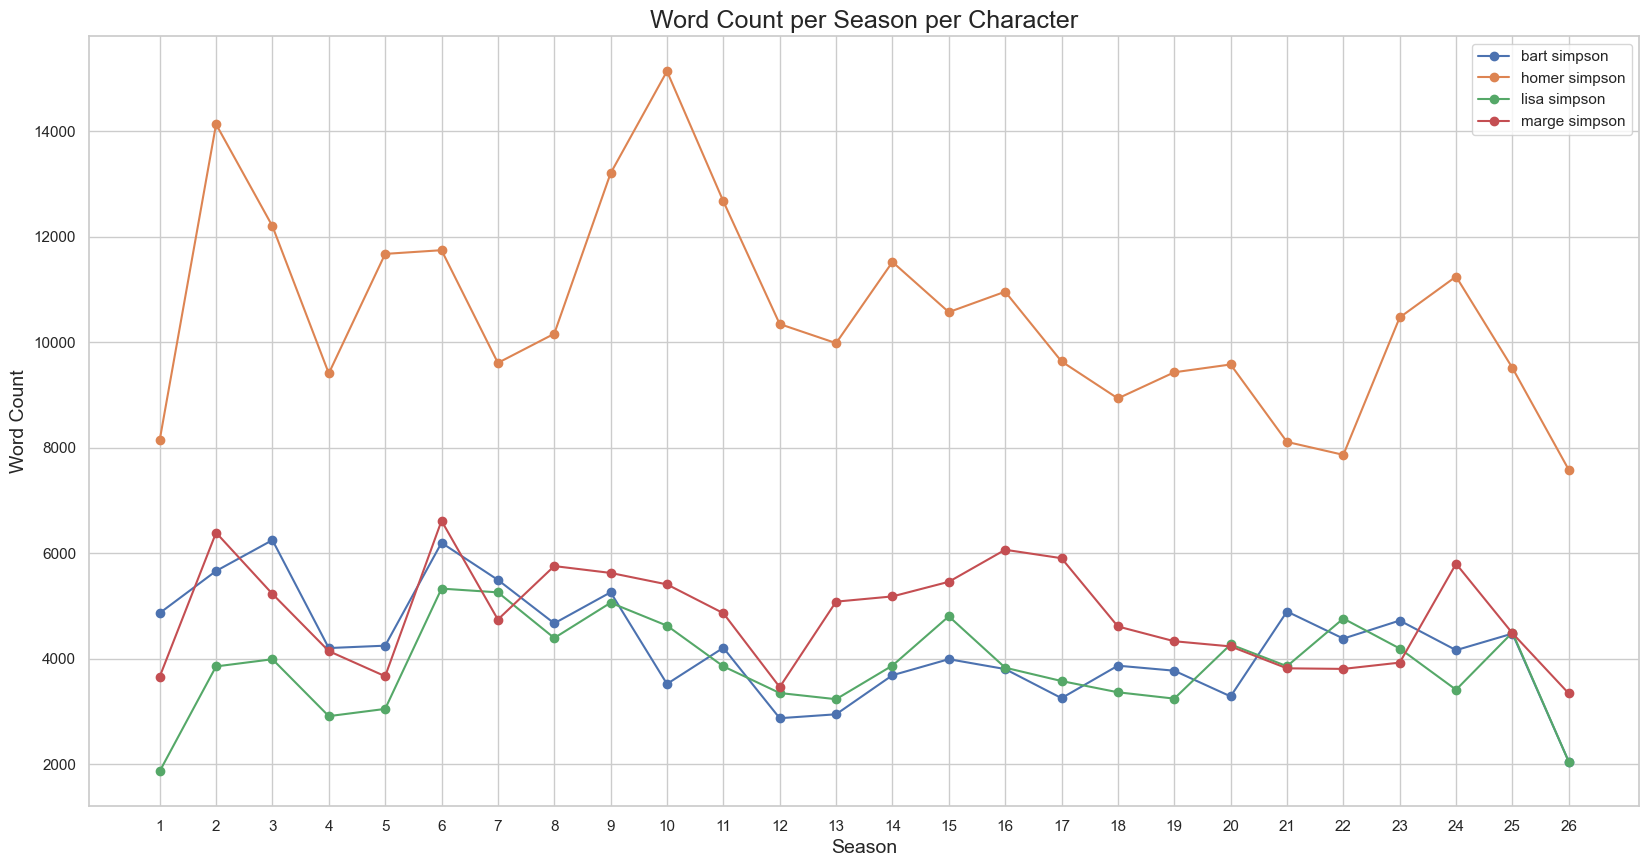

In [224]:
import matplotlib.pyplot as plt
df_season_character_copy = df_season_character.copy()
df_season_character = df_season_character_copy.copy()
''' group by characters and sum the word count per season in descending order and only include a list of characters per season '''
df_season_character = df_season_character.loc[df_season_character['character'].isin(['bart simpson', 'homer simpson', 'lisa simpson', 'maggie simpson', 'marge simpson'])]
df_season_character = df_season_character.groupby(['season','character']).sum().sort_values(by=['season','word_count'], ascending=False).groupby('season').head(5).reset_index()
characters = ['bart simpson', 'homer simpson', 'lisa simpson', 'marge simpson']

fig, ax = plt.subplots(figsize=(20,10))
for character in characters:
    df = df_season_character[df_season_character['character'] == character]
    ax.plot(df['season'], df['word_count'], label=character, marker='o')
    ax.set_xticks(df['season'])
ax.set_xlabel('Season', fontsize=14)
ax.set_ylabel('Word Count', fontsize=14)
ax.set_title('Word Count per Season per Character', fontsize=18)
ax.legend()
plt.show()


It is obvious that the word count does underly some changes but the ranking roughly stays the same. Homer always says the most and Marge, Bart and Lisa have roughly the same speaking time.

## Counting trivia

In [225]:
features_df = pd.read_csv('./Datasets/scraped/ref_counts_clean.csv')
episodes_df = pd.read_csv('./Datasets/data-society-the-simpsons-by-the-data/simpsons_episodes.csv')
voting_df = pd.read_csv('./Datasets/scraped/voting_demographics.csv')

voting_df['season'] = voting_df['season'].astype(int)
voting_df['episode'] = voting_df['episode'].astype(int)
voting_df = voting_df.sort_values(by=['season', 'episode'])
voting_df.index += 1
features_df.index +=1
analysis_df = pd.concat([features_df.head(600), voting_df.head(600)], axis=1)
analysis_df['season'] = analysis_df['season'].astype(int)
analysis_df['episode'] = analysis_df['episode'].astype(int)

In [226]:
def smooth(scalars, weight):
    last = scalars[0]
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point
        smoothed.append(smoothed_val)
        last = smoothed_val

    return smoothed

def normalize(data, column):
    return (data[column]-data[column].mean())/data[column].std()

In [227]:
import matplotlib.pyplot as plt

rating_cols = ['total_rating', '<18_rating', '18-29_rating', '30-44_rating', '45+_rating']
ref_cols = ['cult_refs_count', 'self_refs_count', 'goofs_count', 'errors_count']

def ratings_refs_graph(data, col, refs, xlabel, title):
    y1 = smooth(list(normalize(data, refs)), 0.9)
    y2 = smooth(list(normalize(data, col)), 0.9)
    plt.plot(y1, label=refs)
    plt.plot(y2, label=col)
    plt.legend()
    plt.ylabel('Normalized scale')
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()

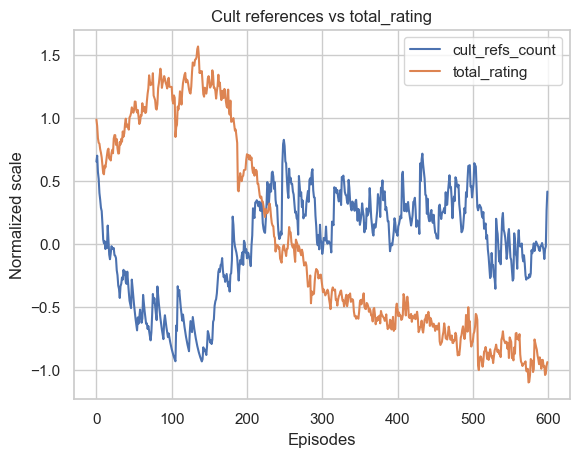

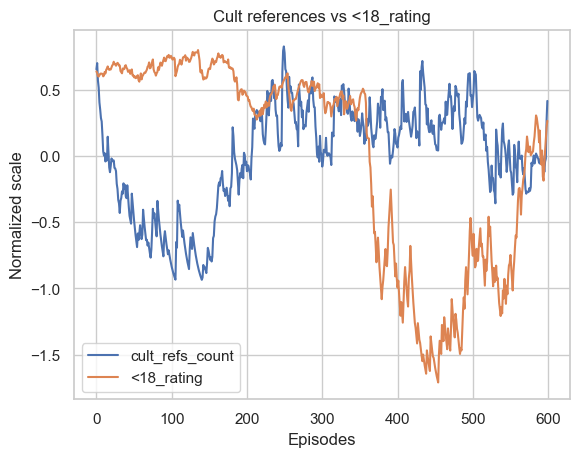

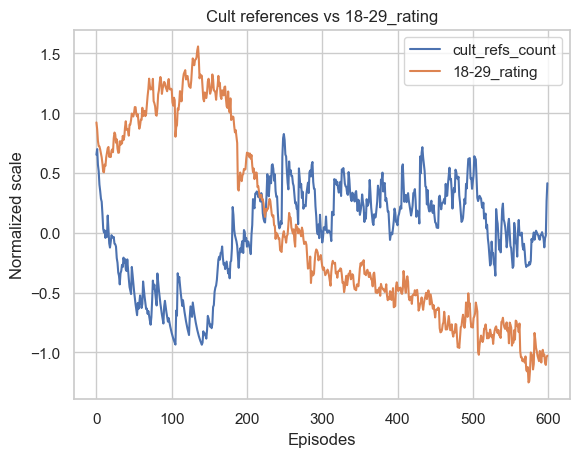

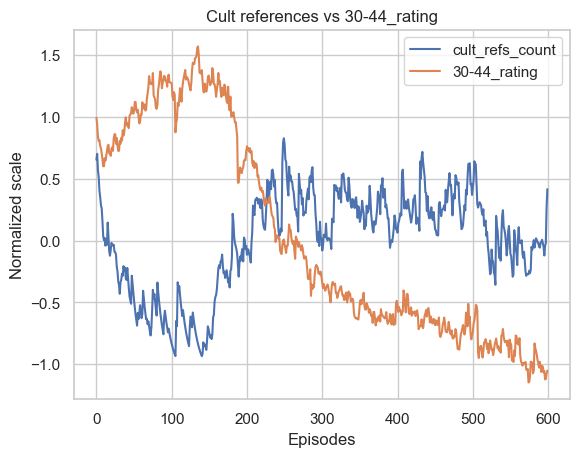

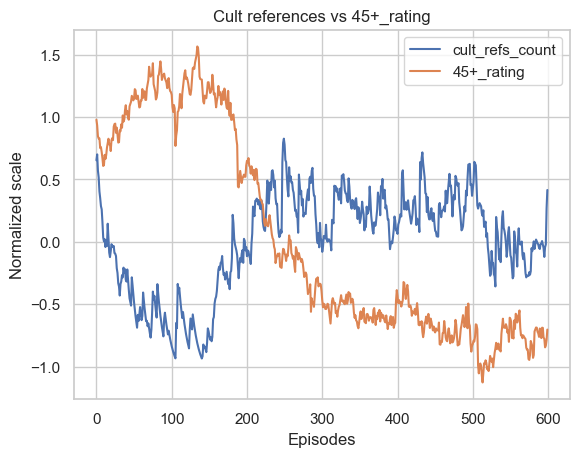

In [228]:
for col in rating_cols:
    ratings_refs_graph(analysis_df, col, 'cult_refs_count', 'Episodes', 'Cult references vs ' + col)

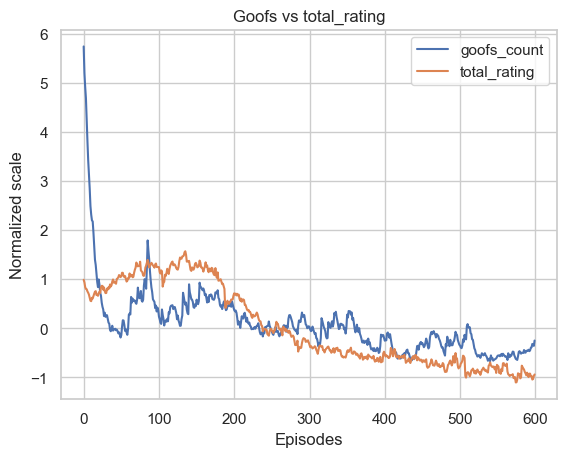

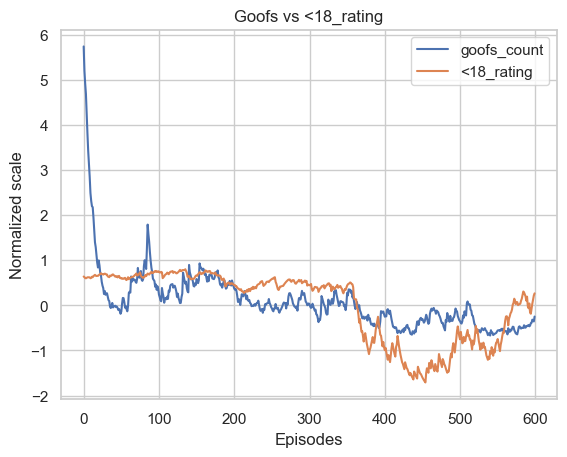

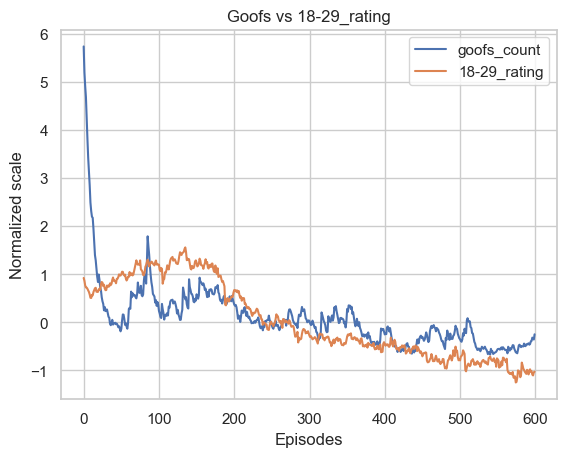

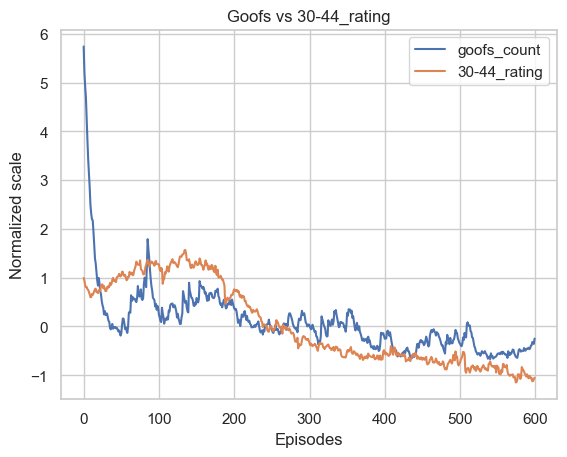

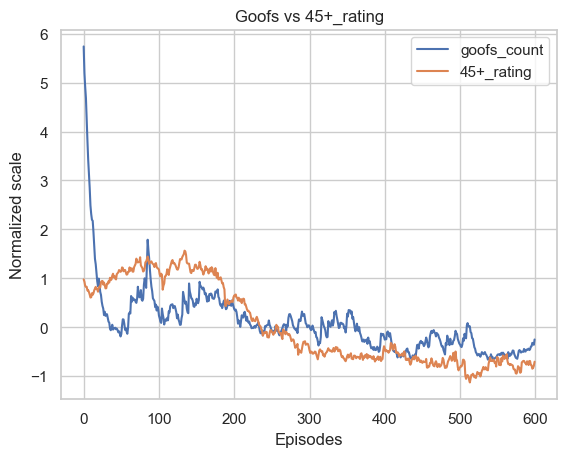

In [229]:
for col in rating_cols:
    ratings_refs_graph(analysis_df, col, 'goofs_count', 'Episodes', 'Goofs vs ' + col)

In [230]:
ref_cols_mean = ['mean_' + x for x in ref_cols]
ref_cols_sum = ['sum_' + x for x in ref_cols]
rating_cols_mean = ['mean_' + x for x in rating_cols]

season_granular_mean = analysis_df.groupby(by='season').mean().add_prefix('mean_')
season_granular_sum = analysis_df.groupby(by='season').sum().add_prefix('sum_')
season_granular_analysis = pd.concat([season_granular_mean, season_granular_sum], axis=1)

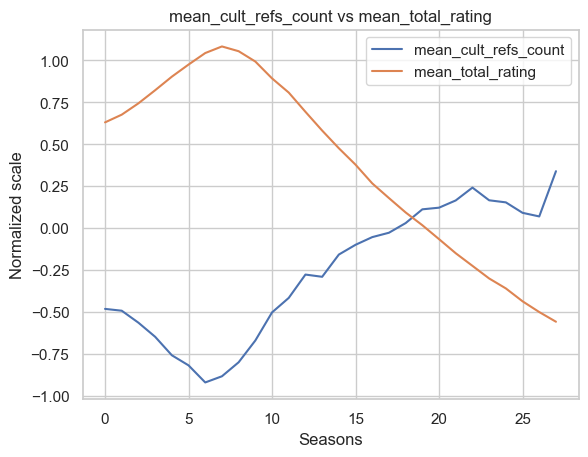

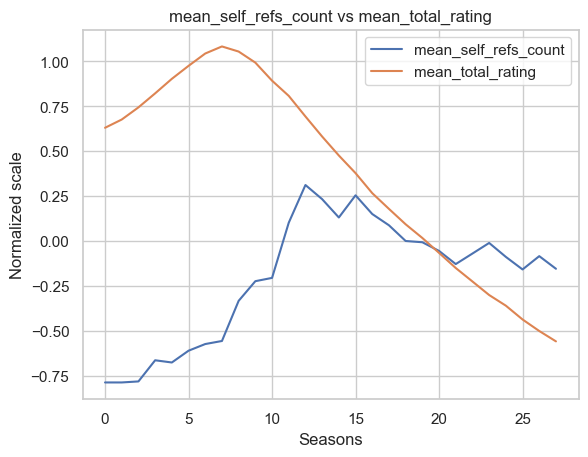

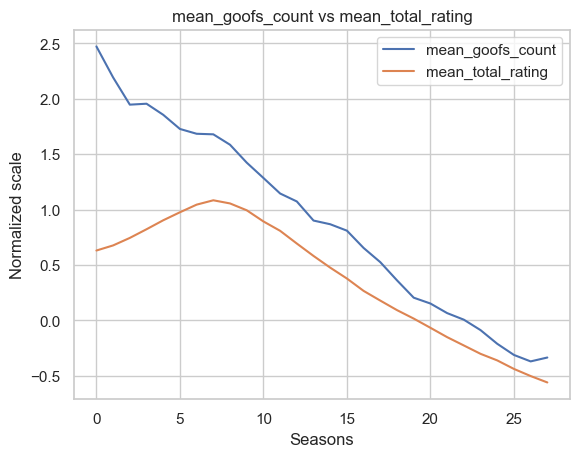

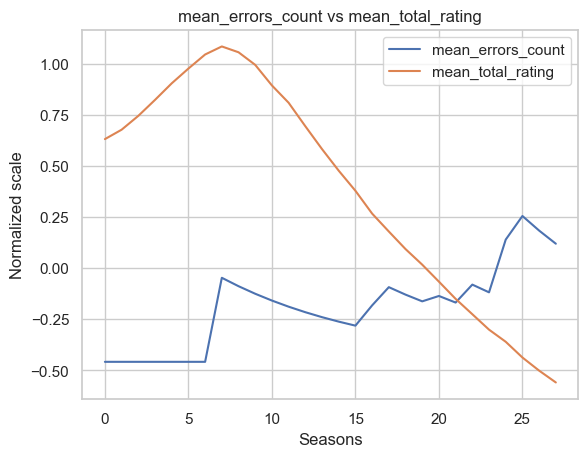

In [231]:
for col in ref_cols_mean:
    ratings_refs_graph(season_granular_analysis, 'mean_total_rating', col, 'Seasons', col + ' vs mean_total_rating')

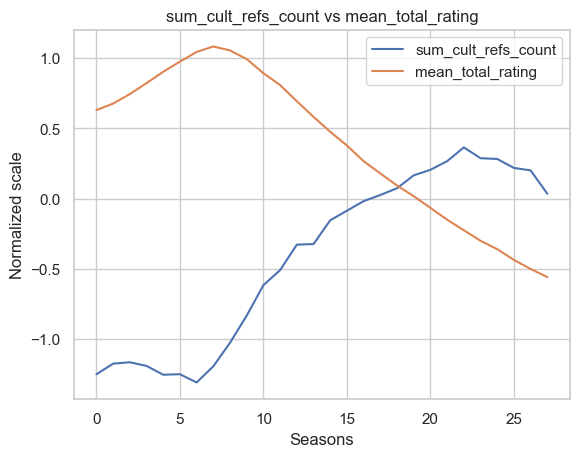

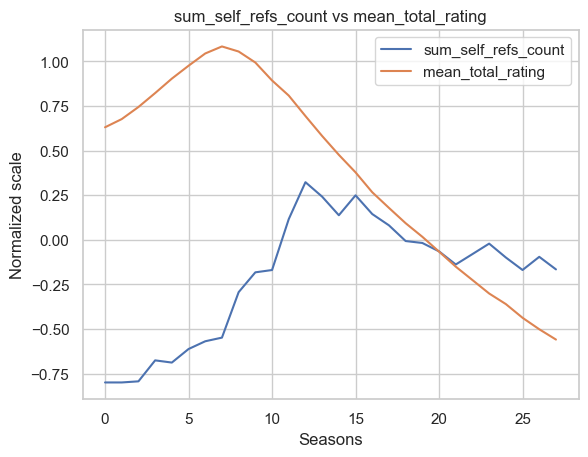

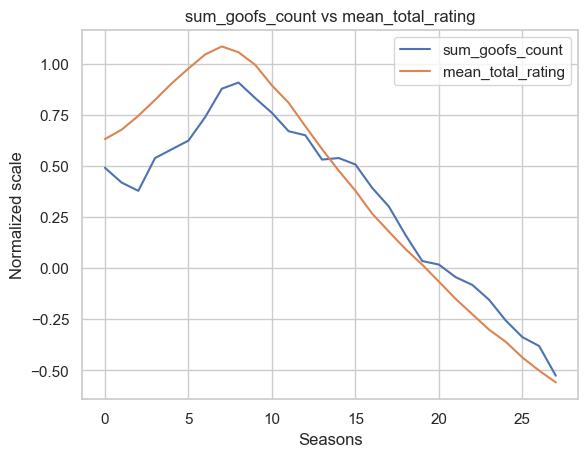

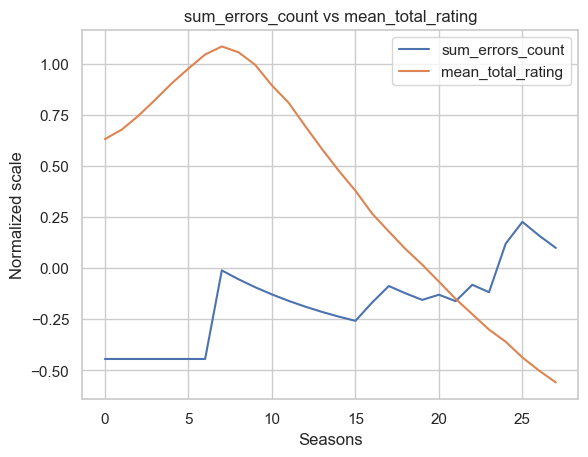

In [232]:
for col in ref_cols_sum:
    ratings_refs_graph(season_granular_analysis, 'mean_total_rating', col, 'Seasons', col + ' vs mean_total_rating')

## Catchphrase trends

Sources used in this section:
- stopwords: https://www.ranks.nl/stopwords
- plotting function: https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py

In [233]:
stopwords_df = pd.read_csv('Datasets/scraped/stopwords.csv')
script_df = pd.read_csv('Datasets/data-society-the-simpsons-by-the-data/simpsons_script_lines.csv')
characters_df = pd.read_csv('Datasets/data-society-the-simpsons-by-the-data/simpsons_characters.csv')
script_df['character_id'] = script_df['character_id'].fillna(0).astype(int)

C:\Users\nikol\AppData\Local\Temp\ipykernel_12904\1098175798.py:2: DtypeWarning: Columns (4,5,26) have mixed types. Specify dtype option on import or set low_memory=False.
  script_df = pd.read_csv('Datasets/data-society-the-simpsons-by-the-data/simpsons_script_lines.csv')


In [234]:
names_list = characters_df['normalized_name'].tolist()
sep_names_list = []
for name in names_list:
    if ' ' in name:
        sep_names_list += name.split(' ')
    else:
        sep_names_list.append(name)
stopwords_df = pd.concat([stopwords_df, pd.DataFrame({'stopwords':sep_names_list})], ignore_index=True)

In [235]:
character_lines = []
for i in range(6000):
    spaced_lines = script_df.loc[script_df['character_id']==(i+1)]['normalized_text']+' '
    sep_lines = spaced_lines.tolist()
    sep_lines = [x for x in sep_lines if str(x) != 'nan']
    total_lines = ''.join(sep_lines)
    character_lines.append(total_lines)

In [236]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words=stopwords_df['stopwords'].tolist(),
                             lowercase=True, max_df=0.005, norm='l2', smooth_idf=True)
tf_idf_matrix = vectorizer.fit_transform(character_lines)
feature_names = vectorizer.get_feature_names_out()

D:\Documents\Programming\datamadness\venv\lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['11', '13', '16', '20', '24', '32', '3po', '40', '52s', '60', '80', '800', 'abdul', 'alikes', 'altered', 'amer', 'anti', 'apocalyptic', 'armed', 'ass', 'auto', 'autograph', 'bare', 'beaver', 'bitten', 'bohemian', 'bot', 'bottle', 'bound', 'brew', 'busted', 'cart', 'chapin', 'check', 'chested', 'chilled', 'clam', 'clams', 'clean', 'clone', 'conrad', 'crest', 'day', 'deranged', 'dia', 'ding', 'dong', 'drive', 'dubbed', 'electronically', 'elegantly', 'er', 'ers', 'espn', 'esque', 'euro', 'european', 'eyed', 'fast', 'faucet', 'fedex', 'fielder', 'foot', 'ghibli', 'glue', 'goer', 'golly', 'good', 'goony', 'grade', 'green', 'grumpy', 'guilden', 'hag', 'haired', 'hairy', 'handed', 'hard', 'hating', 'headed', 'holo', 'hop', 'ish', 'jabbar', 'jail', 'jam', 'jocks', 'jub', 'kicked'

In [237]:
def top_k_words(id):
    feature_scores = tf_idf_matrix[id].toarray().tolist()[0]
    feature_dict = dict(zip(feature_names, feature_scores))
    top_k_features = sorted(feature_dict.items(), key=lambda x: x[1], reverse=True)[:10]

    top_k_keywords = [feature[0] for feature in top_k_features]
    char_name = characters_df.loc[characters_df['id']==id+1]['name'].tolist()[0]
    return top_k_keywords, char_name

top_k_words(7)

(['carumba',
  'ay',
  'awesome',
  'lame',
  'sucks',
  'nyah',
  'homework',
  'aye',
  'prank',
  'crappy'],
 'Bart Simpson')

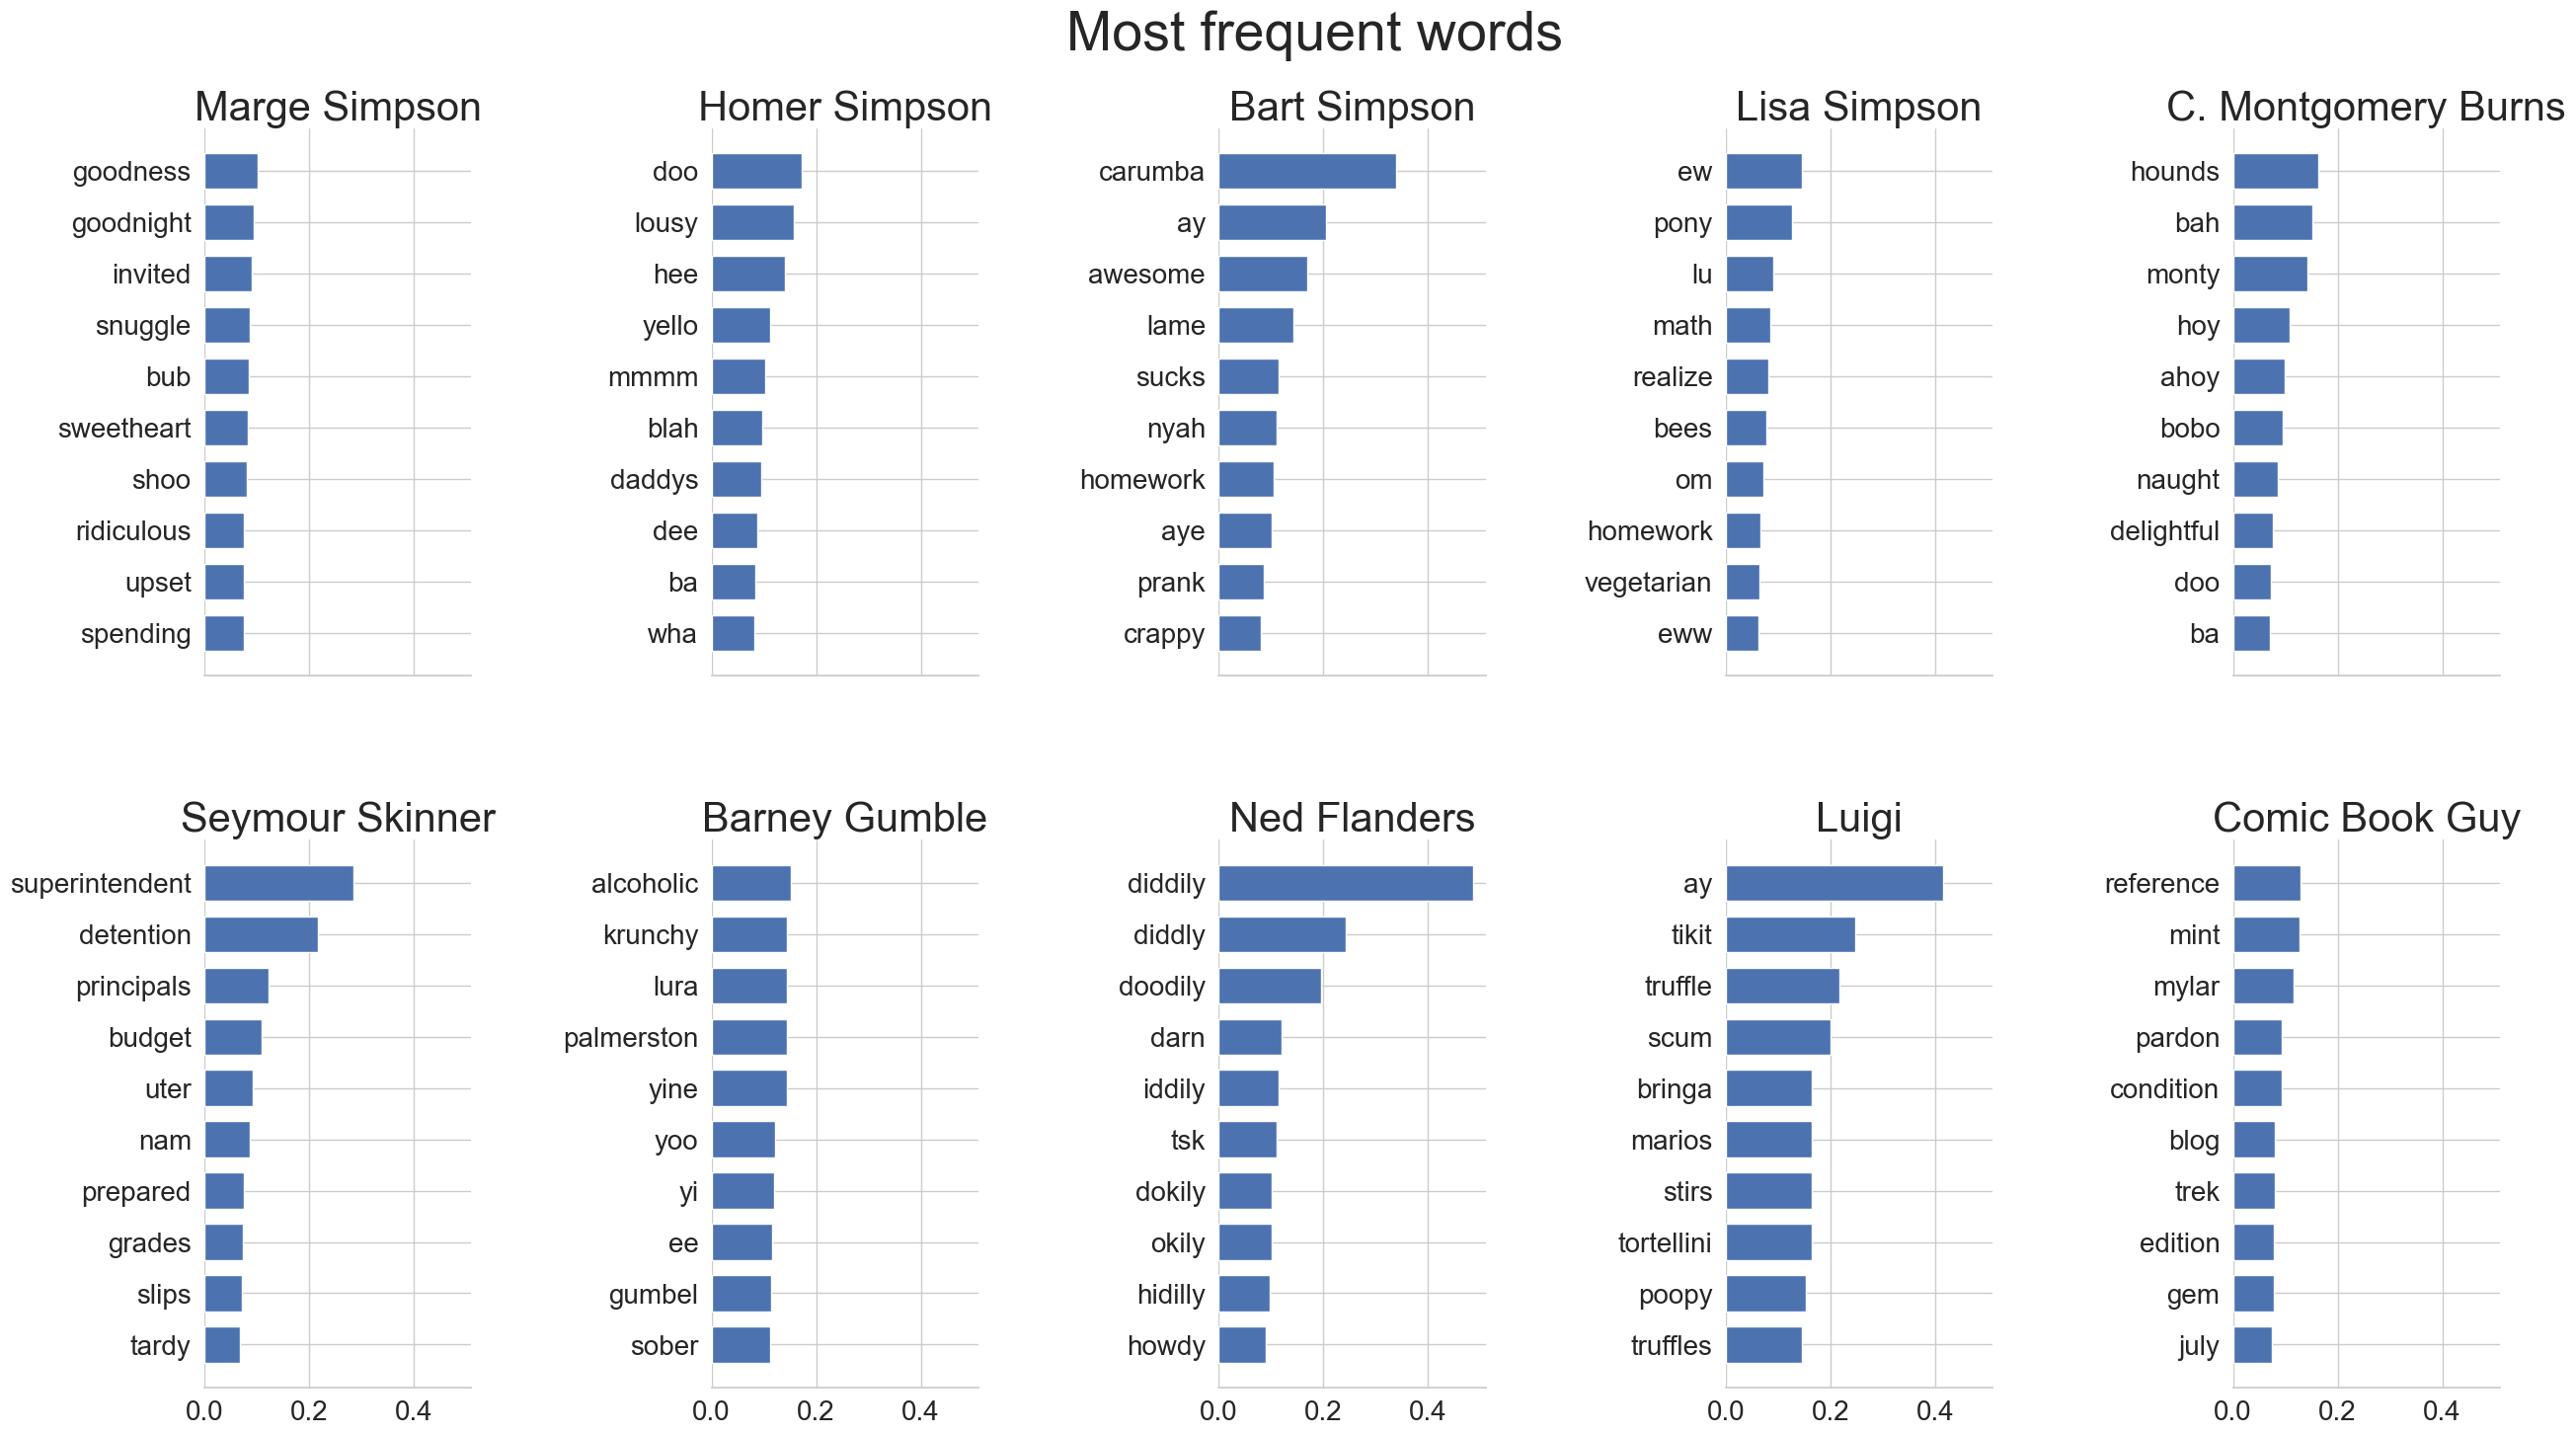

In [238]:
selected_characters = [0, 1, 7, 8, 14, 2, 17, 10, 1434, 800]
catchprases = []
def plot_top_words():
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for idx, char_id in enumerate(selected_characters):
        feature_scores = tf_idf_matrix[char_id].toarray().tolist()[0]
        feature_dict = dict(zip(feature_names, feature_scores))
        top_k_features = sorted(feature_dict.items(), key=lambda x: x[1], reverse=True)[:10]
        top_k_keywords = [feature[0] for feature in top_k_features]

        catchprases.append(top_k_keywords[0])

        weights = [feature[1] for feature in top_k_features]

        character_name = characters_df.loc[characters_df['id']==char_id+1]['name'].iloc[0]

        ax = axes[idx]
        ax.barh(top_k_keywords, weights, height=0.7)
        ax.set_title(f"{character_name}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle('Most frequent words', fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()
plot_top_words()

In [239]:
script_sorted = script_df.sort_values(by='episode_id')
temp_df = episodes_df[['number_in_series', 'season']].sort_values(by='number_in_series')
temp_df = temp_df.rename(columns={'number_in_series':'episode_id'})
script_sorted = pd.merge(script_sorted, temp_df, on='episode_id')

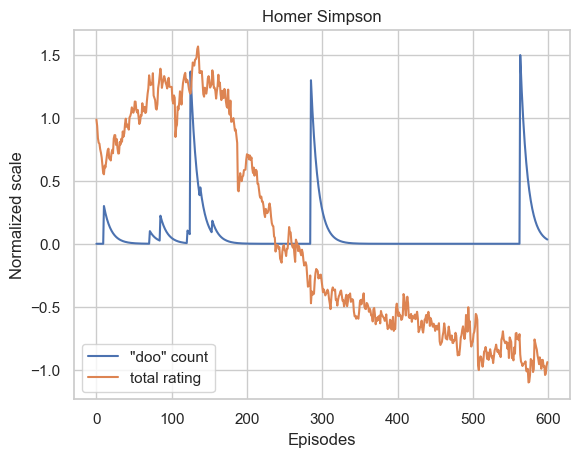

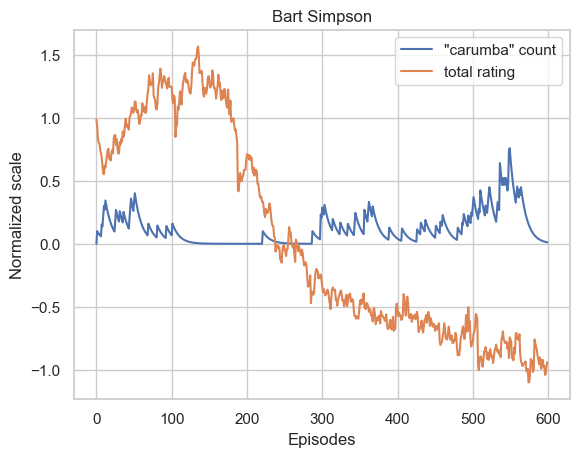

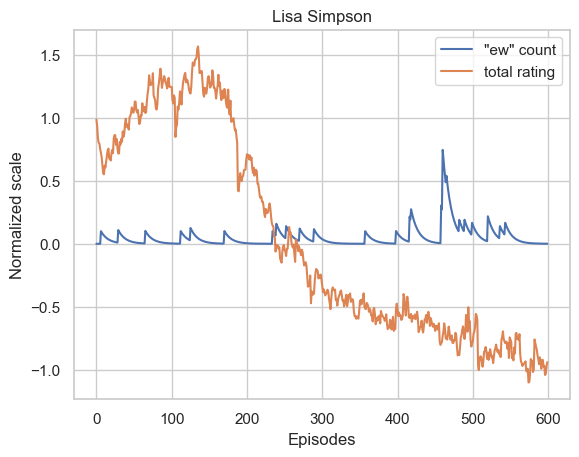

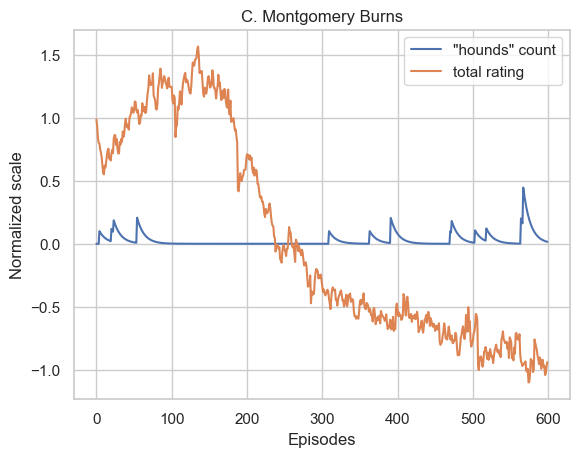

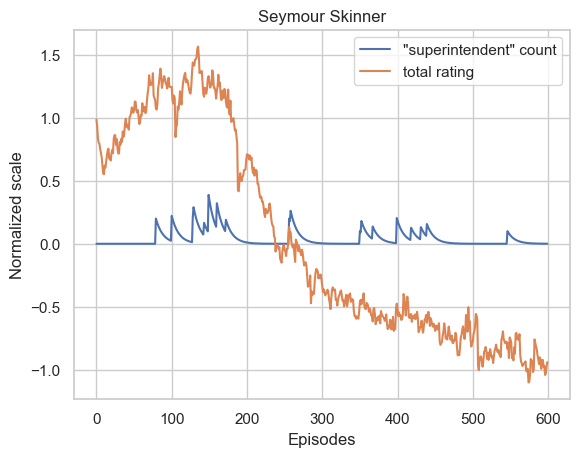

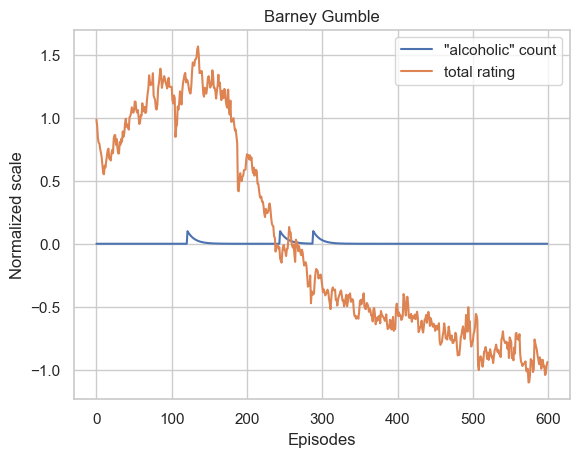

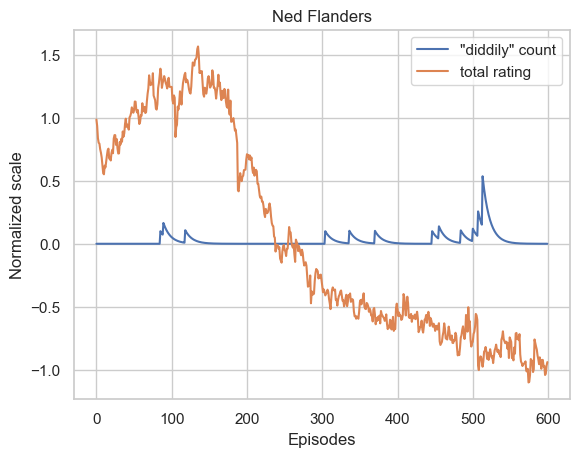

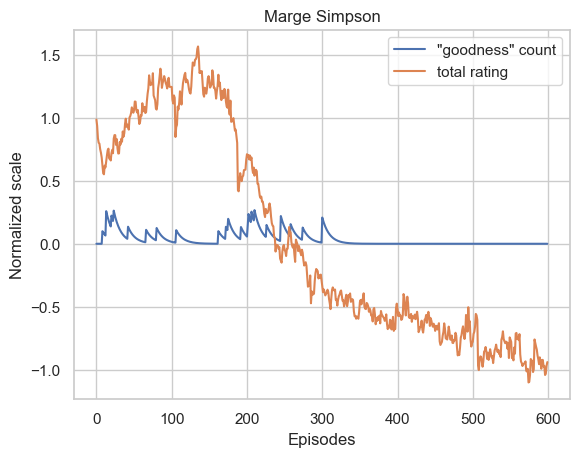

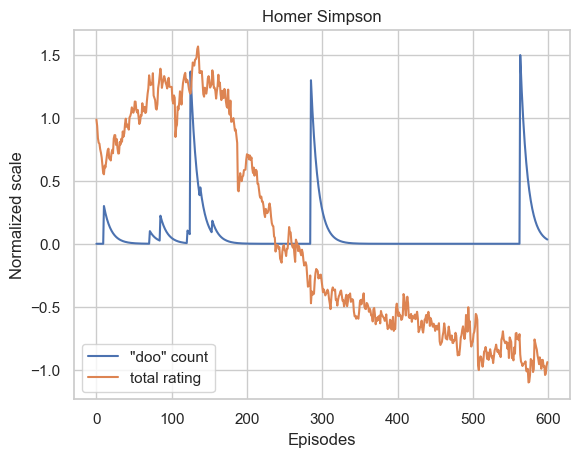

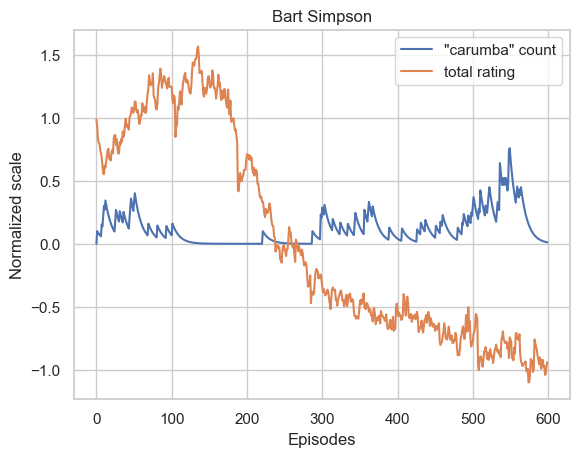

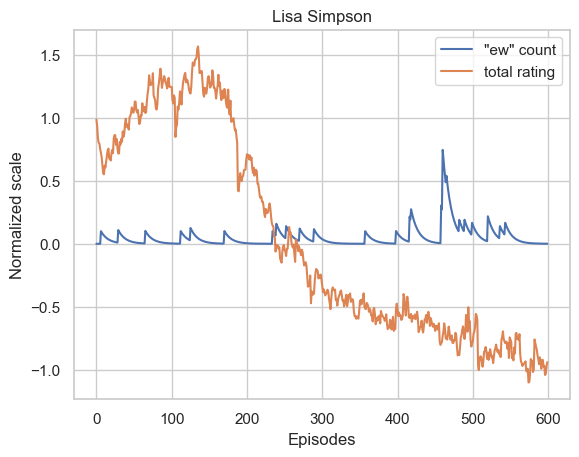

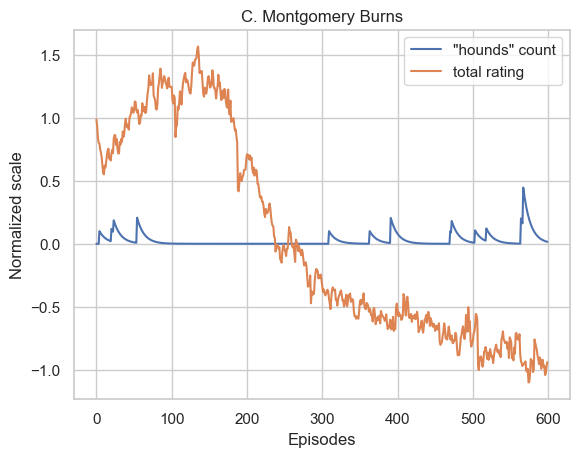

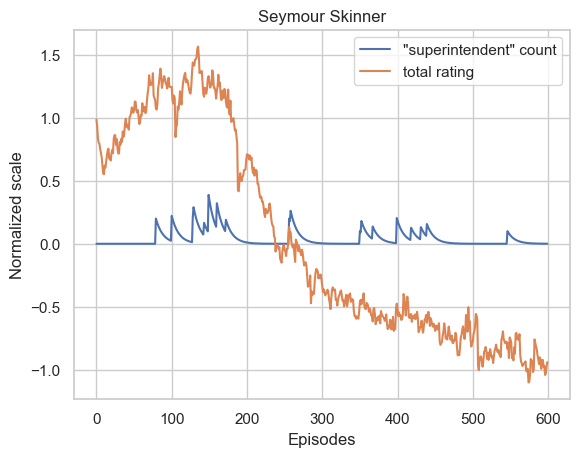

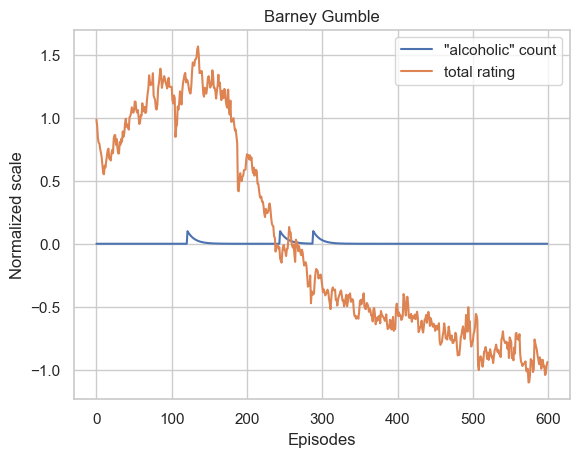

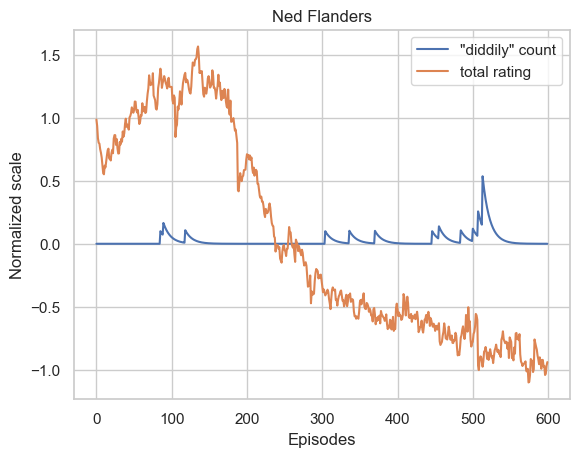

In [272]:
def catch_phrase_per_episode(explored_char):
    phrase_count = []
    for i in range(600):
        char_episode_lines = script_df.loc[(script_df['episode_id']==i) & (script_df['character_id']==selected_characters[explored_char]+1)]['normalized_text']+' '
        char_episode_lines = char_episode_lines.tolist()
        char_episode_lines = [x for x in char_episode_lines if str(x) != 'nan']
        char_episode_words = ''.join(char_episode_lines)
        phrase_count.append(char_episode_words.split().count(catchprases[explored_char]))
    name = characters_df.loc[(characters_df['id']==selected_characters[explored_char]+1)]['name'].iloc[0]
    plt.figure(dpi=100)
    plt.title(name)
    plt.ylabel('Normalized scale')
    plt.xlabel('Episodes')

    y1 = smooth(phrase_count, 0.9)
    y2 = smooth(list(normalize(analysis_df, 'total_rating')), 0.9)
    plt.plot(y1, label=f'"{catchprases[explored_char]}" count')
    plt.plot(y2, label='total rating')
    plt.legend()
    plt.show()
    return (name + ': ' + catchprases[explored_char]), phrase_count

character_phrase_counter = {}
for char_id in range(len(selected_characters)-2):
    char_name, char_phrase_count = catch_phrase_per_episode(char_id)
    character_phrase_counter[char_name] = char_phrase_count

<Axes: xlabel='season'>

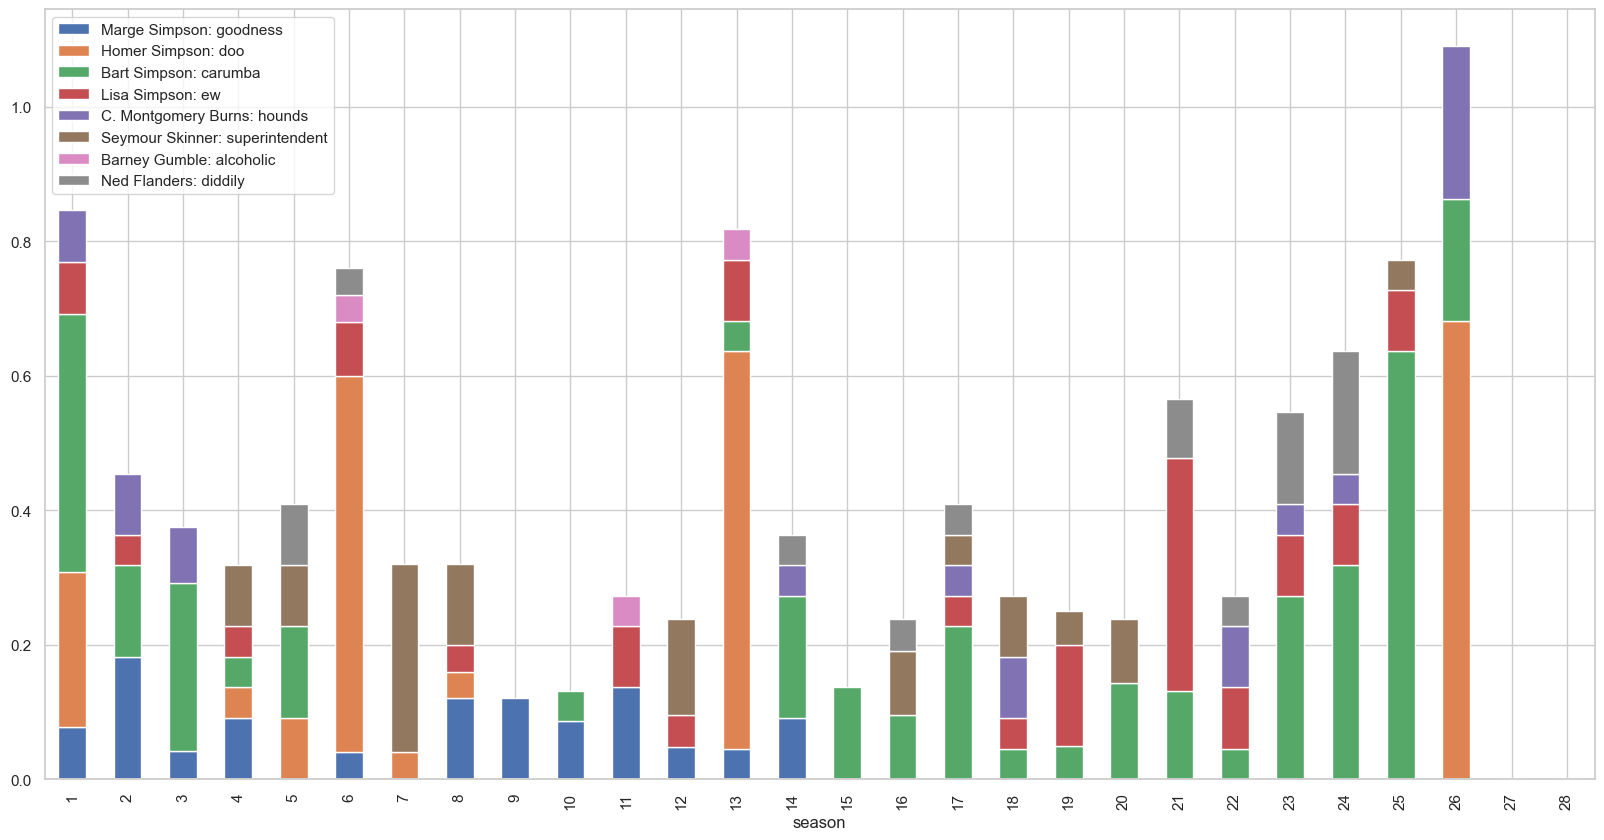

In [274]:
phrase_counter_df = pd.DataFrame(character_phrase_counter)
phrase_counter_df['episode_id'] = [x + 1 for x in range(600)]
phrase_counter_df = pd.merge(phrase_counter_df, analysis_df[['episode_id', 'season']],
                                    on='episode_id')
phrase_counter_df = phrase_counter_df.set_index('episode_id')
phrase_counter_seasons_df = phrase_counter_df.groupby('season').mean()

phrase_counter_seasons_df.plot(kind='bar', stacked=True, figsize=(20, 10))

In [255]:
flanders_id = 10
flanders_words, _ = top_k_words(10)
flanders_words_counts = dict()
for word in flanders_words:
    words_count = []
    for i in range(600):
        char_episode_lines = script_df.loc[(script_df['episode_id']==i) & (script_df['character_id']==flanders_id+1)]['normalized_text']+' '
        char_episode_lines = char_episode_lines.tolist()
        char_episode_lines = [x for x in char_episode_lines if str(x) != 'nan']
        char_episode_words = ''.join(char_episode_lines)
        words_count.append(char_episode_words.split().count(word))
    flanders_words_counts[word] = words_count

In [260]:
flanders_words_counts_df = pd.DataFrame(flanders_words_counts)
flanders_words_counts_df['episode_id'] = [x+1 for x in range(600)]
flanders_words_counts_df = pd.merge(flanders_words_counts_df, analysis_df[['total_rating', 'episode_id', 'season']], on='episode_id')
flanders_words_counts_df = flanders_words_counts_df.set_index('episode_id')
flanders_words_seasons = flanders_words_counts_df.groupby('season').mean()
flanders_words_seasons[['diddily', 'diddly', 'doodily', 'darn', 'iddily', 'tsk', 'dokily',
       'okily', 'hidilly', 'howdy']].plot(kind='bar', stacked=True, figsize=(20, 10))

## Part 3: Exploring relation of variables to rating and each other

### Correlation and Covariance between selected features

In [244]:
words_count = []
for i in range(600):
    char_episode_lines = script_df.loc[(script_df['episode_id']==i) & (script_df['character_id']==8)]['normalized_text']+' '
    char_episode_lines = char_episode_lines.tolist()
    char_episode_lines = [x for x in char_episode_lines if str(x) != 'nan']
    char_episode_words = ''.join(char_episode_lines)
    words_count.append(char_episode_words.split().count('carumba'))
analysis_df['carumba_count'] = words_count

                 total_rating  carumba_count  cult_refs_count  \
total_rating         1.000000      -0.100202        -0.149982   
carumba_count       -0.100202       1.000000        -0.015083   
cult_refs_count     -0.149982      -0.015083         1.000000   
self_refs_count     -0.044515      -0.053638         0.047030   
goofs_count          0.347612      -0.067415        -0.078413   
errors_count        -0.030445      -0.008457        -0.038719   
season              -0.743896       0.104840         0.224865   

                 self_refs_count  goofs_count  errors_count    season  
total_rating           -0.044515     0.347612     -0.030445 -0.743896  
carumba_count          -0.053638    -0.067415     -0.008457  0.104840  
cult_refs_count         0.047030    -0.078413     -0.038719  0.224865  
self_refs_count         1.000000     0.064071      0.073121 -0.009526  
goofs_count             0.064071     1.000000     -0.028428 -0.332996  
errors_count            0.073121    -0.028428  

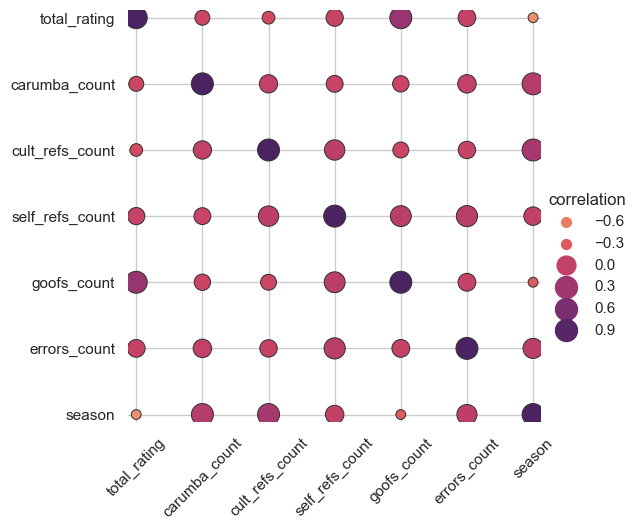

In [297]:
corr_mat_square = analysis_df[['total_rating', 'carumba_count', 'cult_refs_count', 'self_refs_count', 'goofs_count', 'errors_count', 'season']].corr()
print(corr_mat_square)
corr_mat = corr_mat_square.stack().reset_index(name='correlation')

g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette='flare', hue_norm=(-1, 1), edgecolor=".2",
    height=6, sizes=(50, 250), size_norm=(-.2, .1),
)

g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(45)

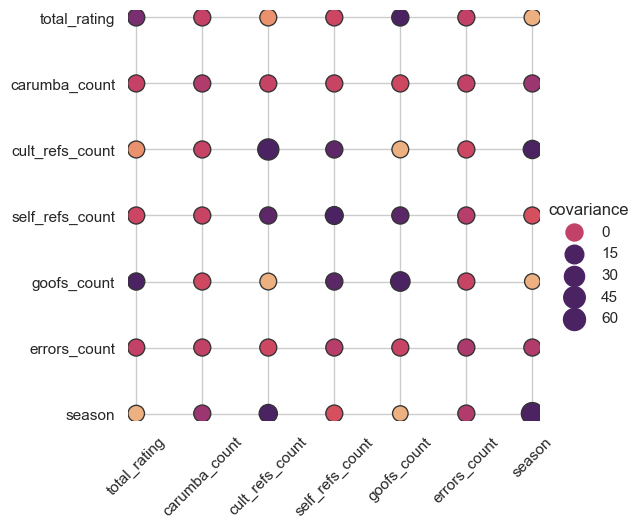

In [278]:
covv_mat = analysis_df[['total_rating', 'carumba_count', 'cult_refs_count', 'self_refs_count', 'goofs_count', 'errors_count', 'season']].cov()
covv_mat = covv_mat.stack().reset_index(name='covariance')

g = sns.relplot(
    data=covv_mat,
    x="level_0", y="level_1", hue="covariance", size="covariance",
    palette='flare', hue_norm=(-1, 1), edgecolor=".2",
    height=6, sizes=(50, 250), size_norm=(-50, 50),
)

g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(45)

### Spectral analysis of selected features

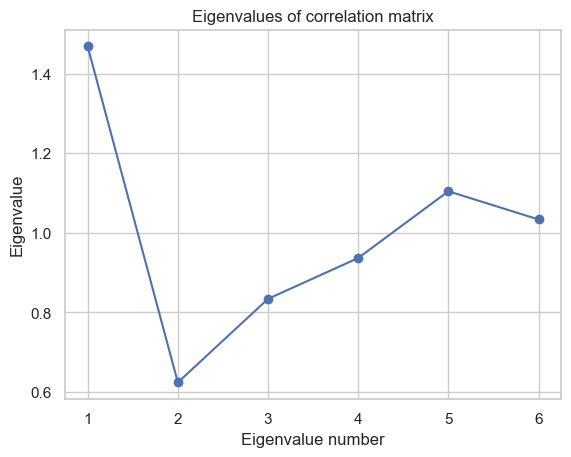

In [290]:
corr_mat_square = analysis_df[['carumba_count', 'cult_refs_count', 'self_refs_count', 'goofs_count', 'errors_count', 'season']].corr()
eigenvalues, eigenvectors = np.linalg.eig(corr_mat_square)
plt.plot(np.arange(len(eigenvalues)), eigenvalues, 'o-')
plt.xticks(np.arange(len(eigenvalues)), np.arange(len(eigenvalues))+1)
plt.xlabel('Eigenvalue number')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues of correlation matrix')
plt.show()

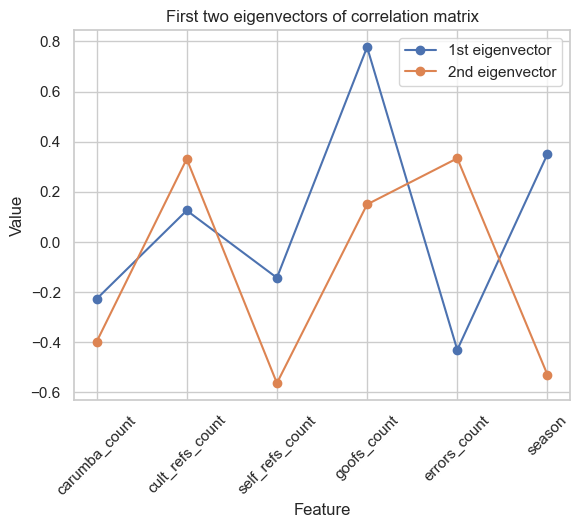

In [296]:
labels = ['carumba_count', 'cult_refs_count', 'self_refs_count', 'goofs_count', 'errors_count', 'season']
plt.plot(labels, eigenvectors[0], 'o-', label='1st eigenvector')
plt.plot(labels, eigenvectors[1], 'o-', label='2nd eigenvector')
plt.legend()
plt.xticks(rotation=45)
plt.xlabel('Feature')
plt.ylabel('Value')
plt.title('First two eigenvectors of correlation matrix')
plt.show()

## Part 4: Ethical considerations

### Provide Datasheets for the Dataset (see portal)
### How did you get the data (legally...)?
### Did you check the source?
### Are there considerations about the analysis you made?
### Did you have to make decisions that affect the analysis?
### What are the limitations of your analysis and your conclusions?
### Who are the stakeholders of your project?
### Who can benefit from this project, who can be harmed, who is excluded, etc.